In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
import math
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
figure(figsize=(25, 15))
%matplotlib inline

<Figure size 2500x1500 with 0 Axes>

# Exploratory Data Analysis( EDA )

In [2]:
regions_list = [
               'Middle Africa', 
               'South-eastern Asia', 
               'Least Developed Countries', 
               'Americas', 
               'Southern Asia', 
               'Non-Annex I countries', 
               'Western Asia', 
               'Eastern Asia', 
               'Asia', 
               'Net Food Importing Developing Countries', 
               'Western Europe', 
               'OECD', 'World', 
               'South America', 
               'Land Locked Developing Countries', 
               'Eastern Europe', 
               'Southern Europe', 
               'Annex I countries', 
               'Low Income Food Deficit Countries', 
               'Northern Europe', 
               'European Union (27)', 
               'Eastern Africa', 
               'Africa', 
               'Europe', 
               'Northern America',
               'Central Asia',
               'Western Africa',
               'Northern Africa',
               'Small Island Developing States',
               'United Kingdom of Great Britain and Northern Ireland',
               'Oceania',
               'Southern Africa',
               'Australia and New Zealand',
               'China, mainland',
]


In [3]:
file_name = "Total Emissions Per Country (2000-2020).csv"
df = pd.read_csv(file_name)

In [4]:
print(df.columns)

Index(['Area', 'Item', 'Element', 'Unit', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


In [5]:
df.head()

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.520,0.5267,0.8200,0.9988,0.8225,1.1821,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.117,0.1185,0.1845,0.2247,0.1851,0.2660,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.637,0.6452,1.0045,1.2235,1.0075,1.4481,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [6]:
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,5.557700e+04,5.403800e+04,5.413700e+04,5.415800e+04,5.416300e+04,5.443100e+04,5.447300e+04,5.431500e+04,5.429600e+04,5.428300e+04,...,5.413600e+04,5.461400e+04,5.450100e+04,5.437900e+04,5.428900e+04,5.425200e+04,5.407600e+04,5.402400e+04,5.398800e+04,5.367100e+04
mean,3.856126e+04,3.904216e+04,4.028410e+04,4.100938e+04,4.286727e+04,4.314952e+04,4.444425e+04,4.471660e+04,4.537510e+04,4.548273e+04,...,4.661655e+04,4.684830e+04,4.726650e+04,4.815619e+04,4.861396e+04,4.859484e+04,4.928708e+04,5.020469e+04,5.077654e+04,4.934009e+04
std,5.154896e+05,5.198948e+05,5.330651e+05,5.516273e+05,5.770778e+05,5.899925e+05,6.103802e+05,6.215176e+05,6.353495e+05,6.342332e+05,...,6.749568e+05,6.836862e+05,6.885162e+05,7.002371e+05,7.023532e+05,7.003692e+05,7.107106e+05,7.267194e+05,7.328659e+05,7.085584e+05
min,-3.477871e+06,-3.148175e+06,-3.148175e+06,-3.148175e+06,-3.148175e+06,-3.379504e+06,-3.183029e+06,-3.148175e+06,-3.206885e+06,-3.284492e+06,...,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.331180e+06,-2.696392e+06,-2.702046e+06,-2.636985e+06,-2.636985e+06
25%,8.800000e-02,5.930000e-02,6.430000e-02,7.172500e-02,6.730000e-02,7.500000e-02,7.510000e-02,8.380000e-02,7.950000e-02,8.520000e-02,...,9.037500e-02,9.400000e-02,8.600000e-02,9.400000e-02,9.900000e-02,9.840000e-02,1.024000e-01,9.540000e-02,1.056750e-01,9.850000e-02
50%,1.818250e+01,1.578825e+01,1.662830e+01,1.739455e+01,1.733800e+01,1.839900e+01,1.794510e+01,1.874600e+01,1.917250e+01,1.928380e+01,...,2.015420e+01,2.029590e+01,2.051560e+01,2.026050e+01,2.099980e+01,2.172340e+01,2.151655e+01,2.103045e+01,2.225050e+01,2.240500e+01
75%,9.975307e+02,9.487612e+02,9.850304e+02,1.024513e+03,1.029695e+03,1.071787e+03,1.052052e+03,1.073137e+03,1.077510e+03,1.081210e+03,...,1.110414e+03,1.128912e+03,1.140294e+03,1.141328e+03,1.161278e+03,1.193939e+03,1.177659e+03,1.166767e+03,1.180875e+03,1.192541e+03
max,3.880104e+07,3.858777e+07,3.977286e+07,4.107819e+07,4.314763e+07,4.407000e+07,4.578420e+07,4.632066e+07,4.721273e+07,4.713105e+07,...,4.913564e+07,4.995763e+07,5.014924e+07,5.110725e+07,5.127620e+07,5.182366e+07,5.252879e+07,5.370033e+07,5.414186e+07,5.201086e+07


In [7]:
df.isna().any()

Area       False
Item       False
Element    False
Unit       False
2000        True
2001        True
2002        True
2003        True
2004        True
2005        True
2006        True
2007        True
2008        True
2009        True
2010        True
2011        True
2012        True
2013        True
2014        True
2015        True
2016        True
2017        True
2018        True
2019        True
2020        True
dtype: bool

In [9]:
# As the categorical columns got no nan's replacing them with zeros's

In [10]:
df = df.fillna(0.0)

In [11]:
# consolidated top 60 polluting areas per year from 2000-2020 

top_polluting_areas= []
_areas = set(df["Area"].to_list())
for year in tqdm(range(2000, 2021)):
    _emissions = []
    for area in _areas:
        try:
            _emissions.append((area, df.loc[df["Area"]==area][str(year)].sum()))
        except KeyError:
            print(area, year)
            exit()
    top_polluting_idxs =list(np.argsort([em[1] for em in _emissions])[-60:]) 
    top_polluting_areas_yearly = [_emissions[idx][0] for idx in top_polluting_idxs] 
    top_polluting_areas += top_polluting_areas_yearly

top_polluting_areas = [cntry for cntry in list(set(top_polluting_areas)) if cntry not in regions_list]

    



100%|██████████| 21/21 [00:09<00:00,  2.21it/s]


In [12]:
df.head()

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.520,0.5267,0.8200,0.9988,0.8225,1.1821,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.117,0.1185,0.1845,0.2247,0.1851,0.2660,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.637,0.6452,1.0045,1.2235,1.0075,1.4481,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


## Emission Sources Identified from the dataset


| Category | Description |
|---|---|
| Crop Residues | Residues left after harvesting crops, such as wheat straw and rice straw. |
| Rice Cultivation | The cultivation of rice, which is a major source of methane emissions. |
| Burning - Crop residues | The burning of crop residues, which is a major source of particulate matter and air pollution. |
| Enteric Fermentation | The process by which ruminant animals, such as cattle, produce methane as a byproduct of digestion. |
| Manure Management | The management of manure, which can be a source of methane and nitrous oxide emissions. |
| Manure left on Pasture | Manure that is left on pasture, which can be a source of methane emissions. |
| Manure applied to Soils | Manure that is applied to soils, which can be a source of nitrous oxide emissions. |
| Synthetic Fertilizers | The use of synthetic fertilizers, which can be a source of nitrous oxide emissions. |
| Drained organic soils | Soils that have been drained, which can be a source of methane emissions. |
| Drained organic soils (CO2) | Methane emissions from drained organic soils. |
| Drained organic soils (N2O) | Nitrous oxide emissions from drained organic soils. |
| On-farm energy use | The use of energy on farms, such as for irrigation, machinery, and processing. |
| Forestland | Land that is covered with trees. |
| Net Forest conversion | The conversion of forestland to other land uses, such as agriculture or development. |
| Savanna fires | Fires that occur in savannas, which can be a source of carbon dioxide emissions. |
| Fires in organic soils | Fires that occur in organic soils, which can be a source of methane emissions. |
| Forest fires | Fires that occur in forests, which can be a source of carbon dioxide emissions. |
| Fires in humid tropical forests | Fires that occur in humid tropical forests, which can be a major source of carbon dioxide emissions. |
| Waste - agri-food systems | Waste from the agri-food system, such as food waste and manure. |
| Fertilizers Manufacturing | The manufacturing of fertilizers, which can be a source of nitrous oxide emissions. |
| On-farm electricity use | The use of electricity on farms, such as for irrigation, machinery, and processing. |
| Food Processing | The processing of food, such as the production of meat, dairy, and vegetables. |
| Food Packaging | The packaging of food, such as the use of plastic and paper. |
| Food Retail | The sale of food, such as in grocery stores and restaurants. |
| Food Household Consumption | The consumption of food in households. |
| Food Transport | The transport of food, such as from farms to grocery stores. |
| Energy | The use of energy in the agri-food system, such as for irrigation, machinery, and processing. |
| IPPU | The International Panel on Climate Change's definition of agricultural production and processing. |
| Waste | Waste from the agri-food system, such as food waste and manure. |
| Other | Other sources of emissions from the agri-food system, such as the use of pesticides and herbicides. |
| Farm-gate emissions | Emissions that occur on farms, such as from enteric fermentation and manure management. |
| Land Use change | The conversion of land from one use to another, such as from forest to agriculture. |
| Emissions on agricultural land | Emissions that occur on agricultural land, such as from crop residues and rice cultivation. |
| Pre- and post- production | Emissions that occur before and after food is produced, such as from fertilizer manufacturing and food waste. |
| Agri-food systems | The entire system of producing, processing, and consuming food. |
| IPCC Agriculture | The Intergovernmental Panel on Climate Change's work on agriculture and climate change. |
| Agricultural Soils | Soils that are used for agriculture. |
| LULUCF | Land-use, land-use change, and forestry. |
| AFOLU | Agriculture, forestry, and other land use. |
| All sectors with LULUCF | All sectors that include land-use, land-use change, and forestry. |
| All sectors without LULUCF | All sectors that do not include land-use, land-use change, and forestry. |
| International bunkers | Emissions from international aviation and shipping. |

## Emission elements from the dataset

Direct emissions (N2O) \
Indirect emissions (N2O) \
Emissions (N2O) \
Emissions (CO2eq) from N2O (AR5) \
Emissions (CO2eq) (AR5) \
Emissions (CH4) \
Emissions (CO2eq) from CH4 (AR5) \
Emissions (CO2) \
Emissions (CO2eq) from F-gases (AR5) 


In [13]:
class EmissionAnalysis:
    '''   
        Note:
            * All Emission Units are in Kilotonnes
        Columns:
            'Area'   : Represents Countries and Regions
            'Item'   : Respresents individual source of emissions
            'Element': element/compounds emitted
        Jargon:
            'LULUCF' : Land use, Land-Use Change and Forestry
    
    '''
    
    def __init__(self, filename):
        self.df      = pd.read_csv(filename)
        self.columns = self.df.columns
        self.emission_sources  = self.get_unique_sources_emission()
        self.emission_elements = self.get_unique_elements_emission()
        self.areas             = self.get_unique_areas()

    def get_unique_sources_emission(self):
        return list(self.df["Item"].unique())
    
    def get_unique_elements_emission(self):
        return list(self.df["Element"].unique())

    def get_unique_areas(self):
        return list(self.df["Area"].unique())

    
    def get_country_info(self, country):
        return self.df.loc[self.df['Area']==country]
    
    def total_emission_country_per_year(self, country, year):
        self.df_c = self.get_country_info(country)
        return self.df_c[year].sum()
    
    def total_emission_world_per_year(self, year):
        return "FIXME"
    
    def get_source_emisison_per_country_year(self,country):
        self.df_c = self.get_country_info(country)
        for idx, src in enumerate(self.emission_sources):
           pass
           #df_src =  
    def get_total_emission_per_source(self):
        src_emission_dict = {}
        for src in self.emission_sources:
            total = 0
            for year in range(2000, 2021):
                total +=  self.df.loc[self.df["Item"]==src][str(year)].sum()
            src_emission_dict[src] = total 
        return src_emission_dict
    def get_total_emission_per_source_timeline(self):
        src_emission_dict_timeline = {'year':[year for year in range(2000, 2021)]}
        for src in self.emission_sources:
            timeline = [] 
            for year in range(2000, 2021):
                timeline.append(self.df.loc[self.df["Item"]==src][str(year)].sum())
            src_emission_dict_timeline[src] = timeline 
        return src_emission_dict_timeline
    
    def get_total_emissions_per_country(self, country):
        df_cntry = df.loc[df['Area']==country]
        return df_cntry.loc[:, '2000':].sum()
    
    def get_total_emissions_per_country_agg(self, top_polluting_areas):
        emission_country_dict_timeline = {'year':[year for year in range(2000, 2021)]}
        emission_per_country_dict = {}
        for _area in top_polluting_areas:
            timeline = []
            for year in range(2000, 2021):
                timeline.append(self.df.loc[self.df["Area"]==_area][str(year)].sum())
            emission_country_dict_timeline[_area] = timeline
        return emission_country_dict_timeline 
            



In [14]:
emission = EmissionAnalysis(file_name)
df_af = emission.get_country_info("Afghanistan")
src_emission_dict = emission.get_total_emission_per_source()
src_emission_dict_timeline = emission.get_total_emission_per_source_timeline()
emission_sources = emission.emission_sources
emission_per_country_dict_tl = emission.get_total_emissions_per_country_agg(top_polluting_areas)

# Visualizations

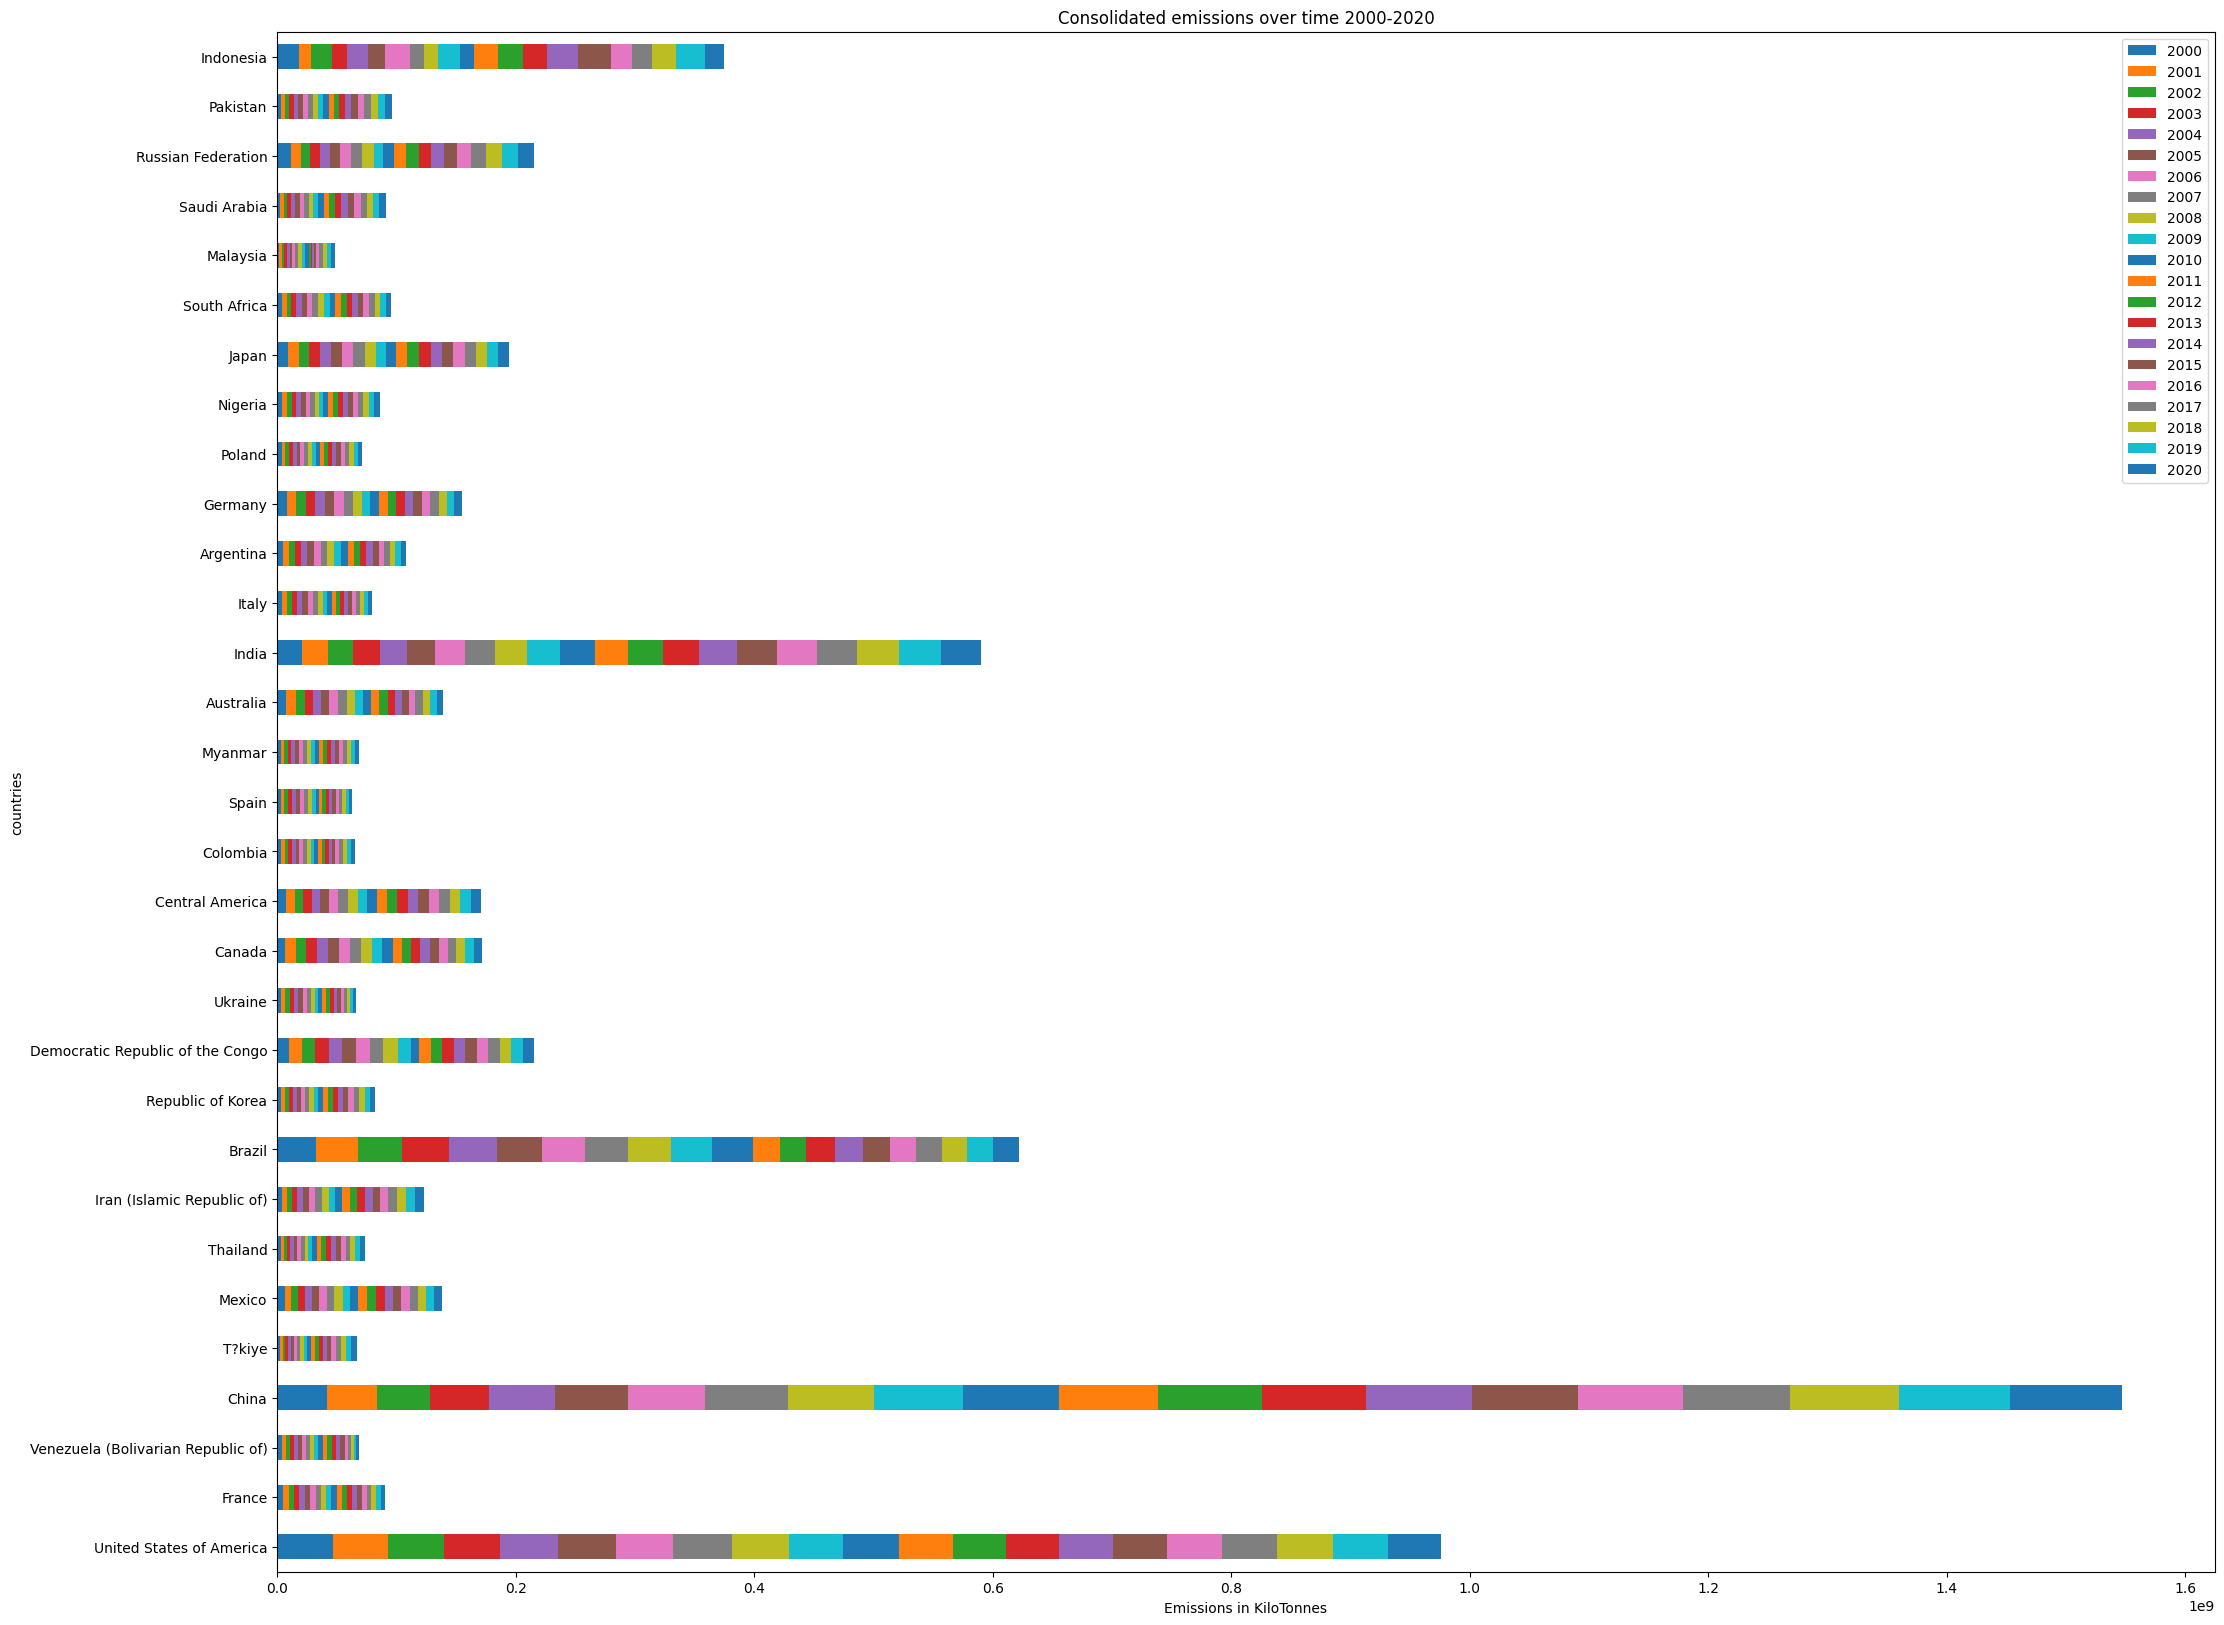

In [15]:
plotdata_dict = {}
ix = 0
for year in range(2000, 2021):
    plotdata_dict[year] = []
    for clmn in list(emission_per_country_dict_tl.keys())[1:]:
        val = emission_per_country_dict_tl[clmn][ix]
        plotdata_dict[year].append(val)
    ix+=1

plotdata = pd.DataFrame(plotdata_dict,
    index=list(emission_per_country_dict_tl.keys())[1:])

ax = plotdata.plot(kind='barh', stacked=True, figsize=(25, 20))
ax.invert_yaxis()  # invert the y-axis

plt.title("Consolidated emissions over time 2000-2020")
plt.xlabel("Emissions in KiloTonnes")
plt.ylabel("countries")

plt.show()


In [16]:
plotdata_dict_elmnt2src = {}
for elmnt in emission.emission_elements:
    plotdata_dict_elmnt2src[elmnt] = []
    df_per_elmnt = df.loc[df["Element"]==elmnt] 
    for src in emission.emission_sources:
        emission_of_source= 0.0
        df_per_elmnt_src = df_per_elmnt.loc[df_per_elmnt["Item"] == src] 
        for year in range(2000, 2021):
            try:
                emission_of_source+= df_per_elmnt_src[str(year)].sum()  
            except ValueError:
                print(df_per_elmnt_src[str(year)].sum(), "error")
                exit()
        plotdata_dict_elmnt2src[elmnt].append(emission_of_source)


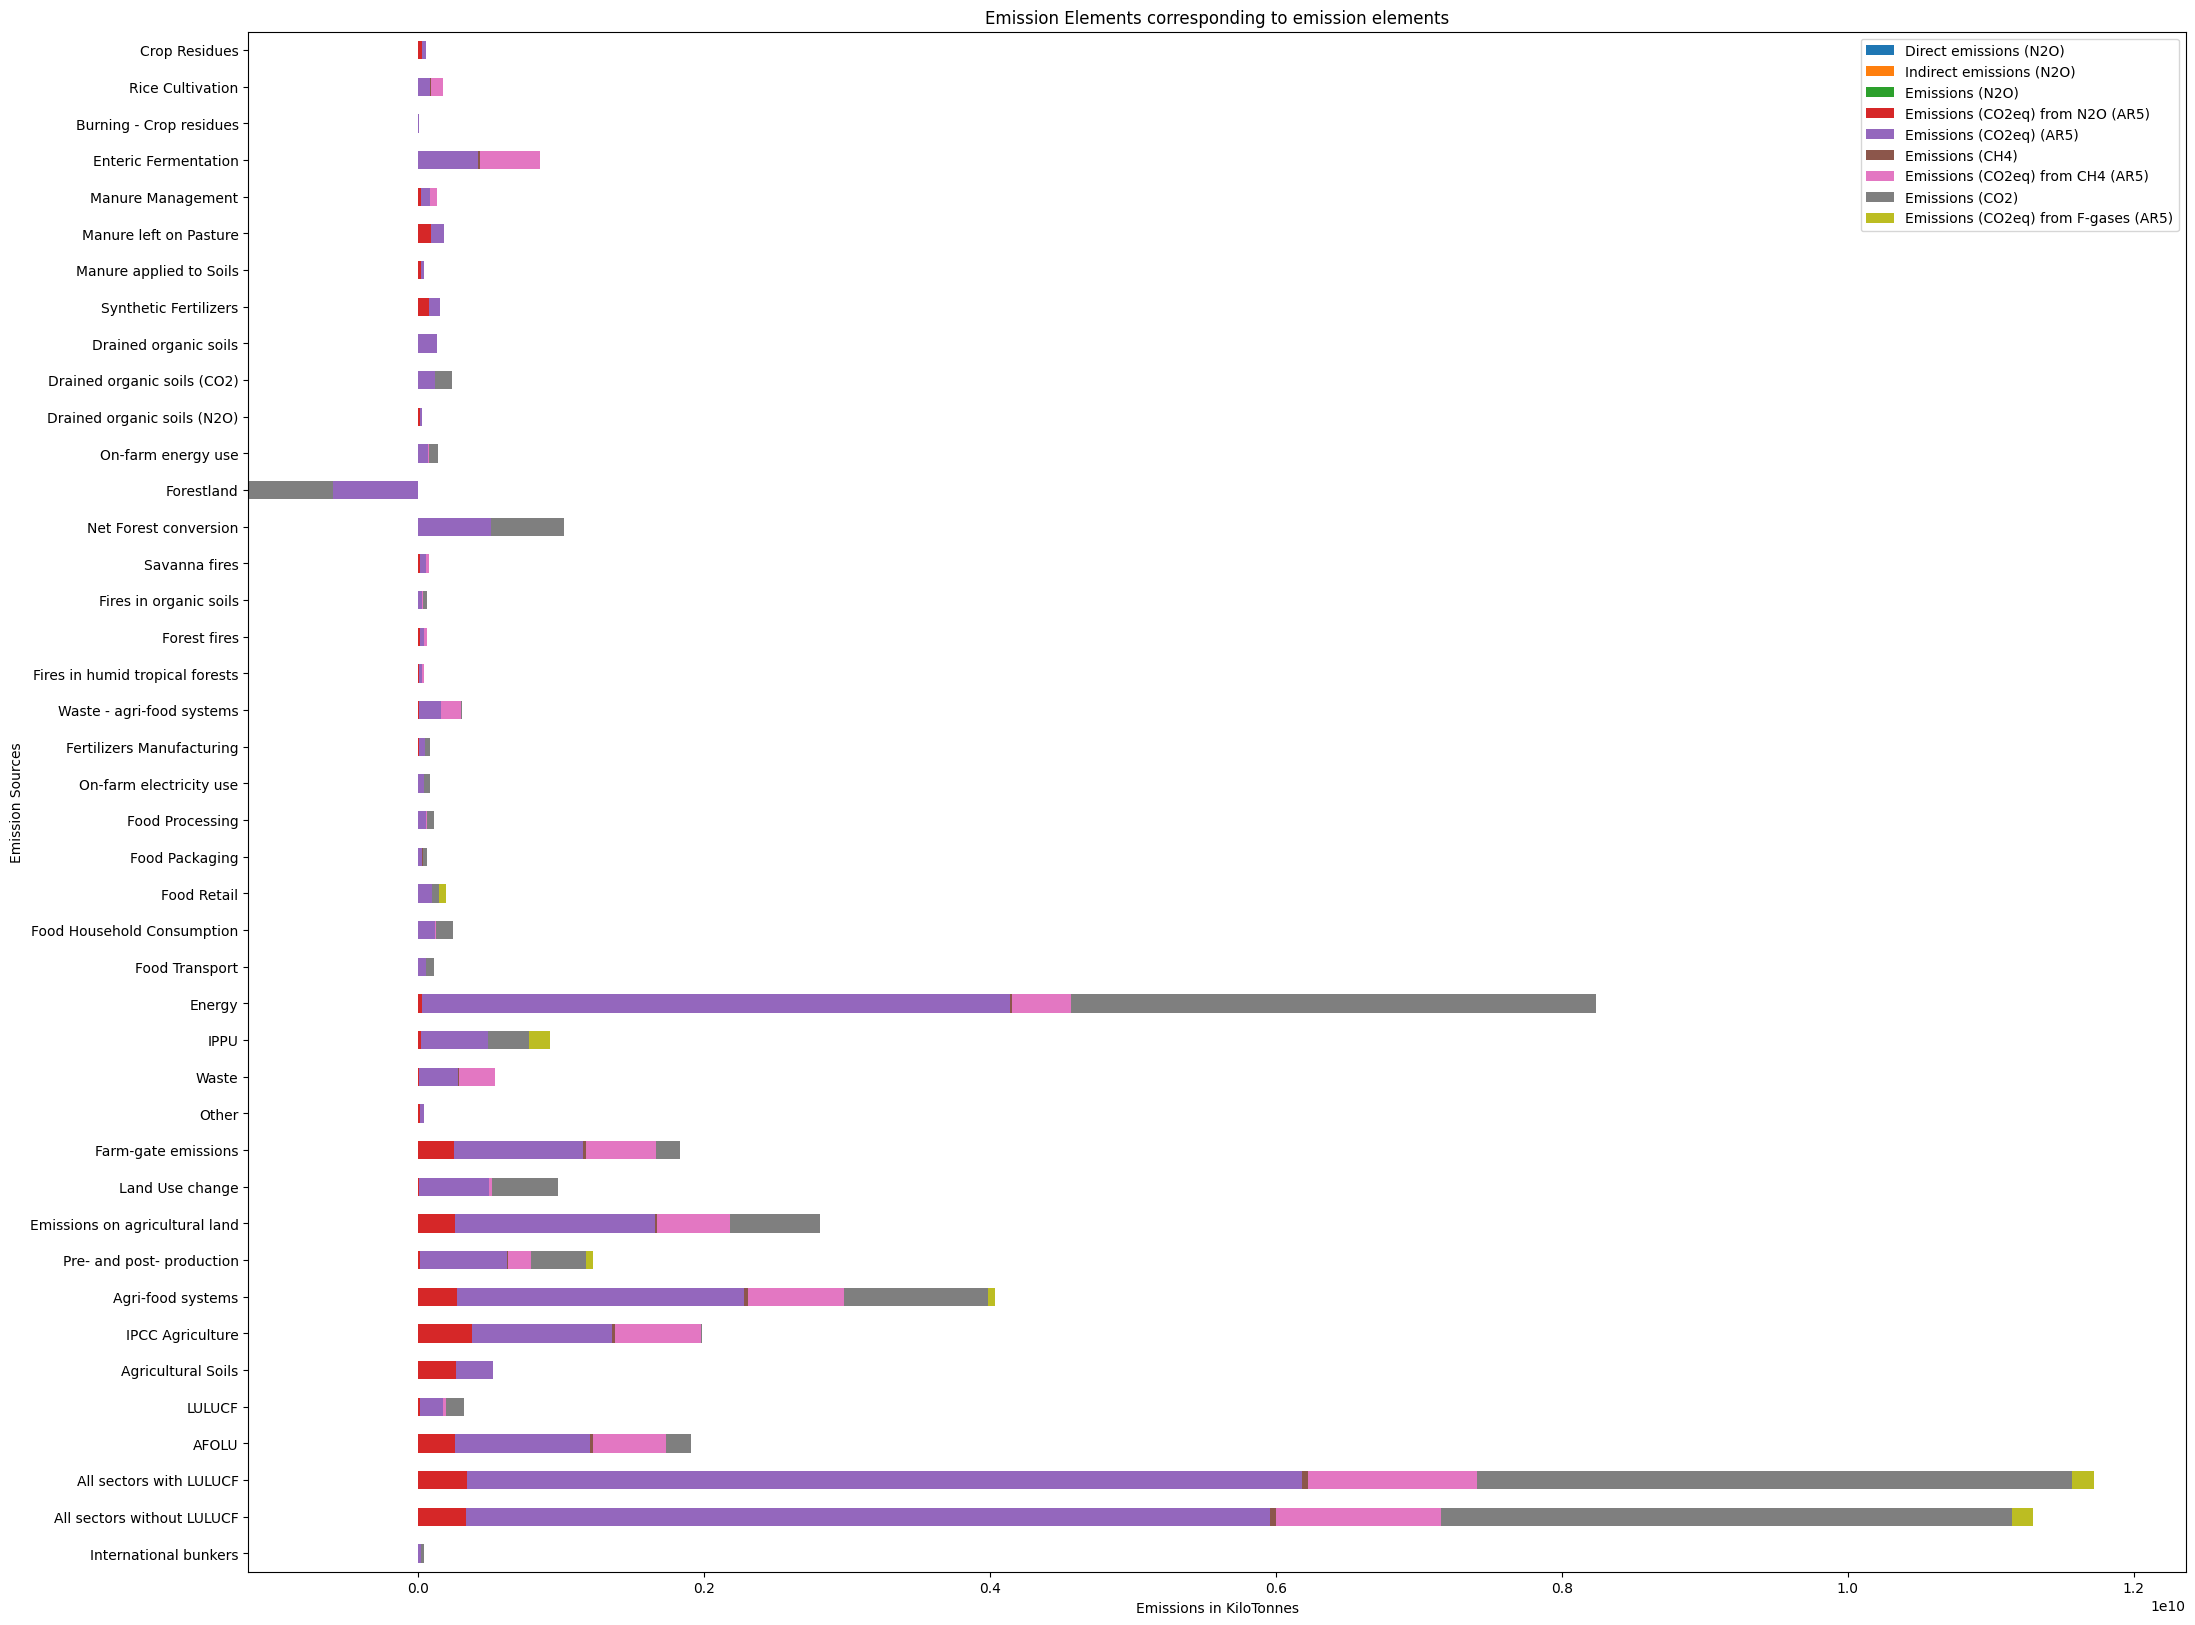

In [17]:
plotdata = pd.DataFrame(plotdata_dict_elmnt2src,
    index=list(emission.emission_sources))

ax = plotdata.plot(kind='barh', stacked=True, figsize=(25, 20))
ax.invert_yaxis()  # invert the y-axis

plt.title("Emission Elements corresponding to emission elements")
plt.xlabel("Emissions in KiloTonnes")
plt.ylabel("Emission Sources")

plt.show()

42

# Analytics

In [18]:
df_ = emission.df
df_ = df_.fillna(0.0) # As NaN's are only seen in numerical columns

In [19]:
df_.columns

Index(['Area', 'Item', 'Element', 'Unit', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [20]:
df_ = df_.drop(columns=['Unit', 'Area', 'Item', 'Element'])

In [21]:
normalized_df=(df_-df_.min())/(df_.max()-df_.min()) # normalized dataframe between 0-1

In [22]:
normalized_df.columns = [''] * len(normalized_df.columns)

In [23]:
normalized_df

,,,,,,,,,,,...,,,,,,,,,,
0,0.082260,0.075431,0.073348,0.071183,0.068001,0.071223,0.065003,0.063640,0.063604,0.065148,...,0.074697,0.073558,0.073298,0.072023,0.071802,0.060397,0.048825,0.047907,0.046443,0.048254
1,0.082260,0.075431,0.073348,0.071183,0.068001,0.071223,0.065003,0.063640,0.063604,0.065148,...,0.074697,0.073558,0.073298,0.072022,0.071802,0.060397,0.048825,0.047907,0.046443,0.048254
2,0.082260,0.075431,0.073348,0.071183,0.068001,0.071223,0.065003,0.063640,0.063604,0.065148,...,0.074697,0.073558,0.073298,0.072023,0.071802,0.060397,0.048825,0.047907,0.046443,0.048254
3,0.082264,0.075435,0.073354,0.071191,0.068007,0.071231,0.065010,0.063648,0.063610,0.065157,...,0.074703,0.073566,0.073306,0.072031,0.071810,0.060404,0.048832,0.047912,0.046450,0.048262
4,0.082264,0.075435,0.073354,0.071191,0.068007,0.071231,0.065010,0.063648,0.063610,0.065157,...,0.074703,0.073566,0.073306,0.072031,0.071810,0.060404,0.048832,0.047912,0.046450,0.048262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58760,0.397862,0.393216,0.383914,0.376937,0.363201,0.359842,0.344723,0.342557,0.333011,0.317816,...,0.317587,0.309101,0.308763,0.301109,0.298674,0.285441,0.274023,0.270359,0.260796,0.247515
58761,0.091584,0.084734,0.083079,0.081114,0.078095,0.081931,0.076259,0.075571,0.076043,0.078585,...,0.089308,0.088072,0.088093,0.087142,0.087273,0.076246,0.064913,0.063950,0.062598,0.065104
58762,0.132996,0.126384,0.122114,0.117270,0.112238,0.113555,0.106662,0.104781,0.103599,0.104140,...,0.111992,0.110127,0.108824,0.107155,0.106637,0.094489,0.083519,0.082012,0.079603,0.081659
58763,0.102448,0.095788,0.092921,0.089553,0.085990,0.088343,0.081867,0.080443,0.079248,0.080775,...,0.090410,0.089303,0.088458,0.087140,0.086807,0.075297,0.064037,0.062710,0.060741,0.062911


In [24]:
normalized_df.iloc[:, -1]

0        0.048254
1        0.048254
2        0.048254
3        0.048262
4        0.048262
           ...   
58760    0.247515
58761    0.065104
58762    0.081659
58763    0.062911
58764    0.312427
Name: , Length: 58765, dtype: float64

In [25]:
#X_train = normalized_df.iloc[:, :-1]
#X_test  = normalized_df.iloc[:, 1:]
#Y_train = normalized_df.iloc[:, -1]

In [26]:
#df_ = pd.get_dummies(df_, columns=categorical_cols)

# Co-relation matrix

<Axes: >

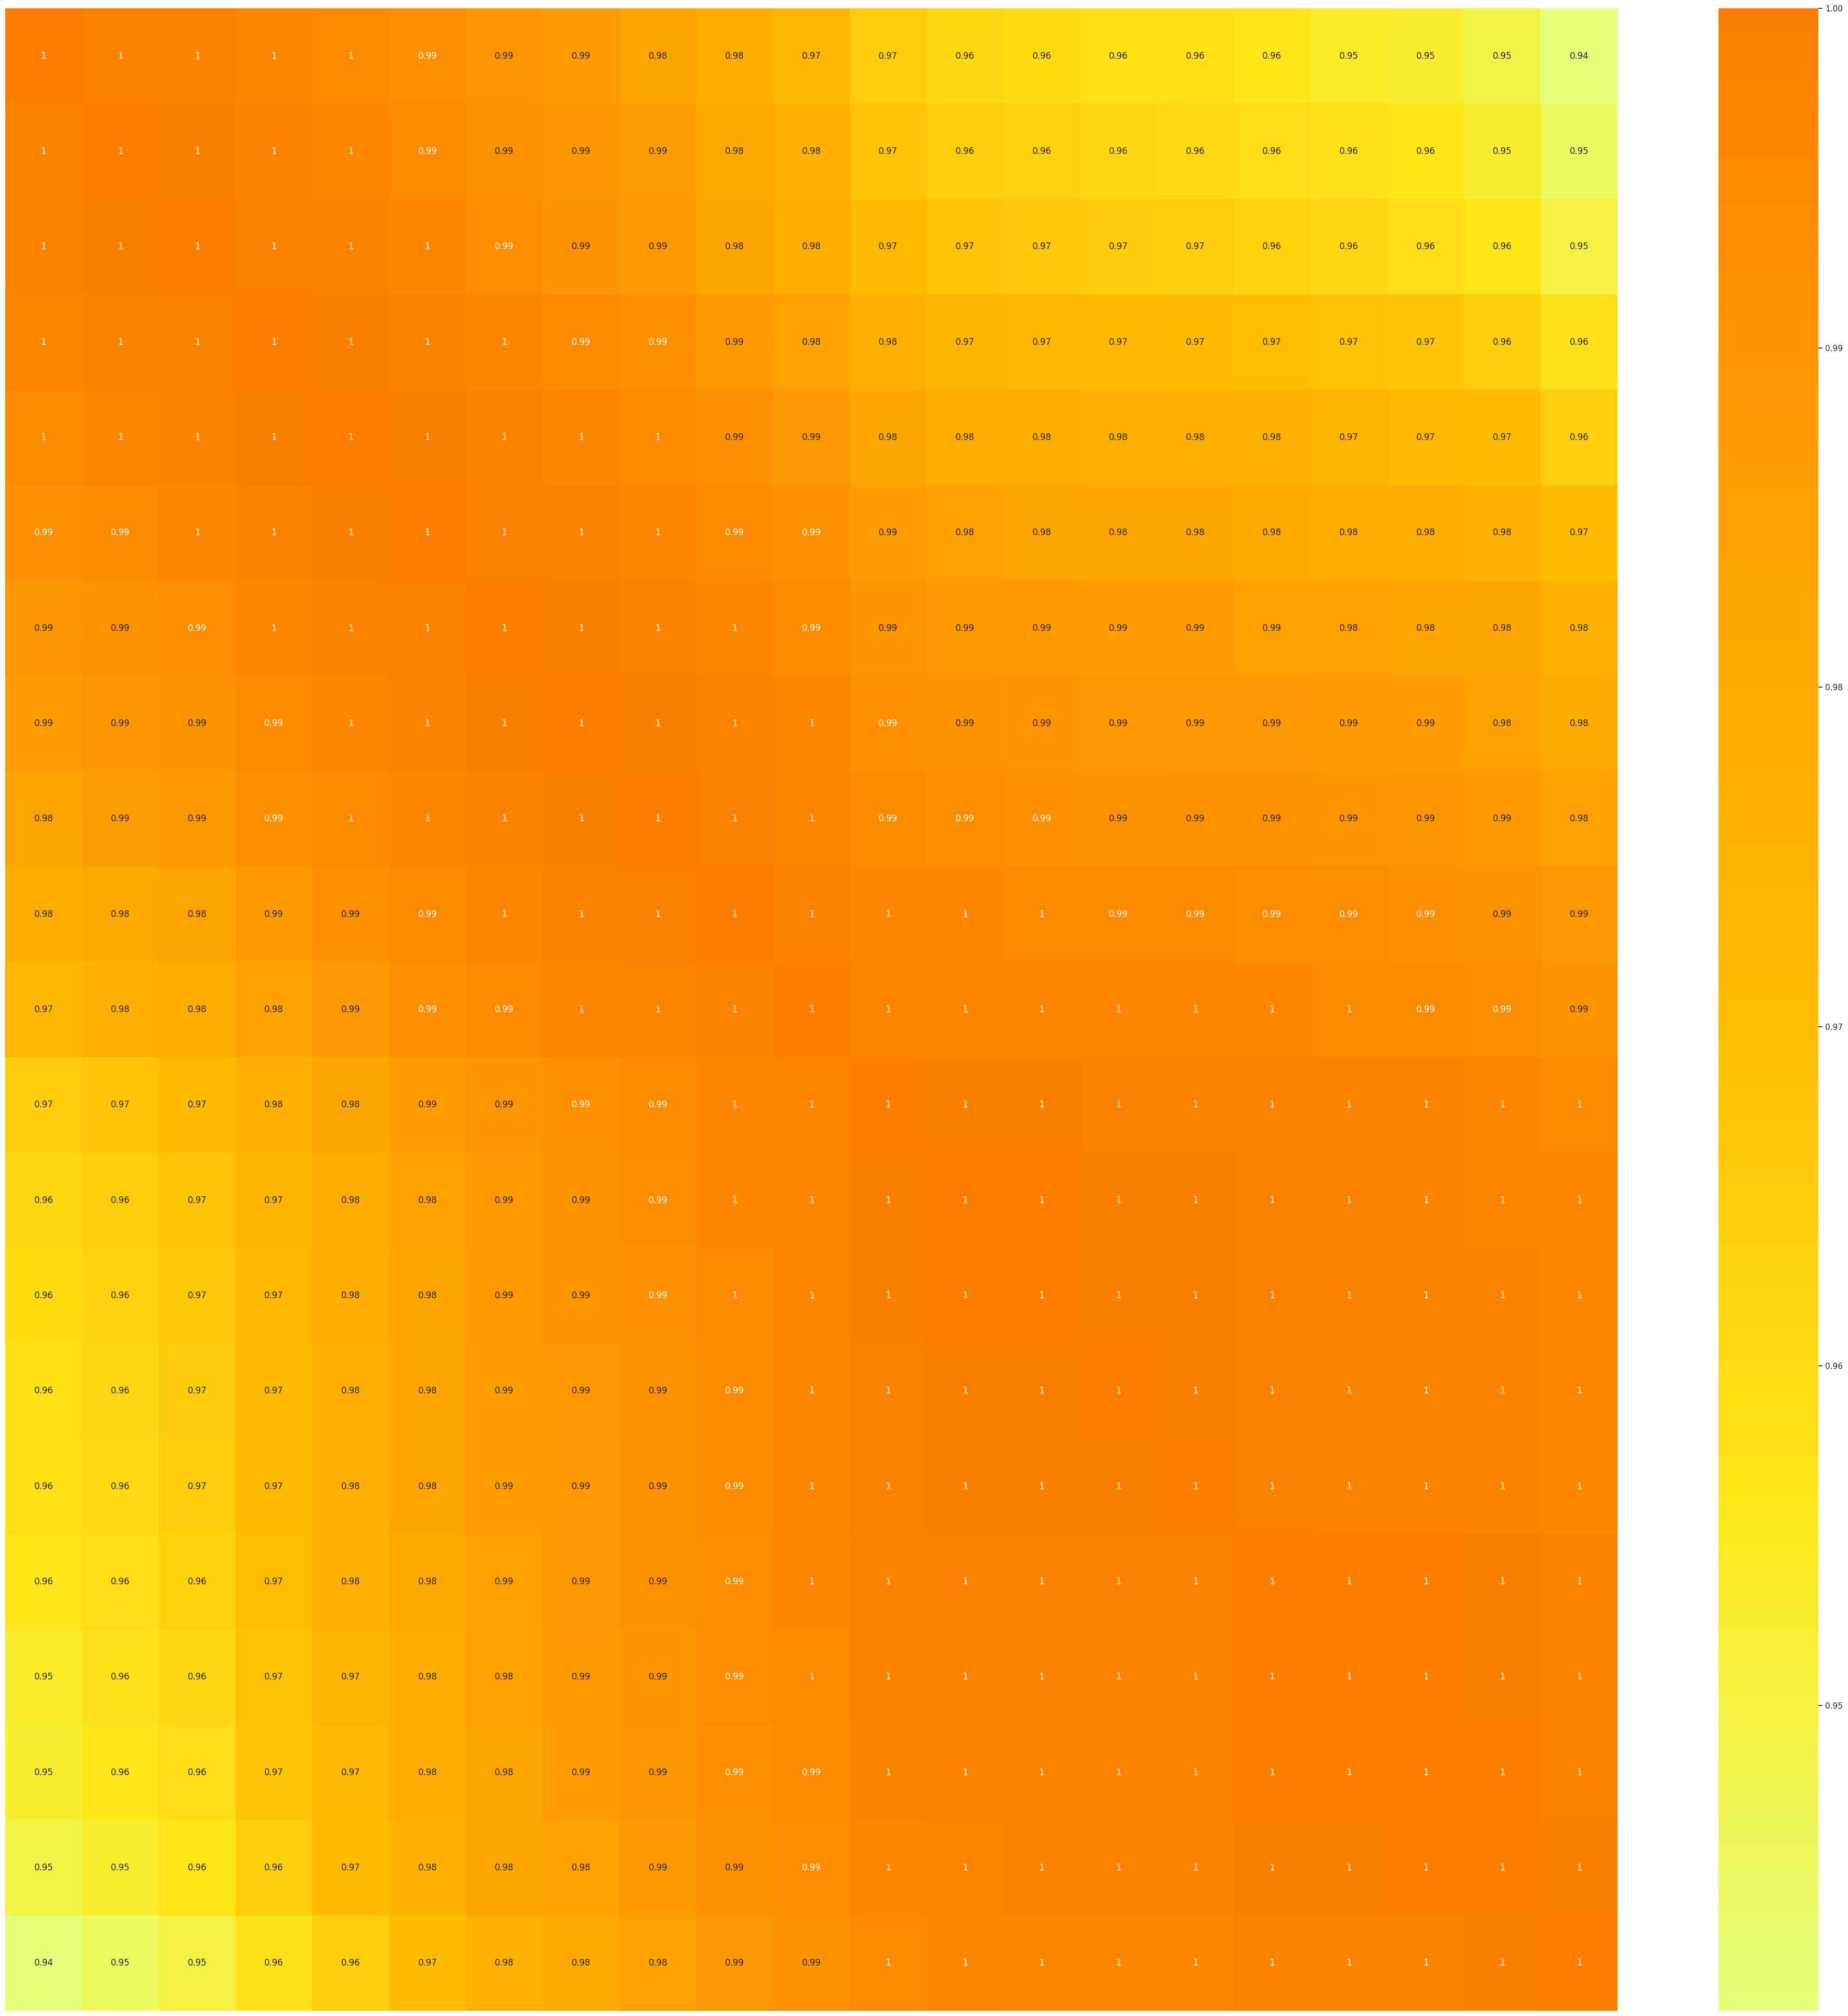

In [27]:
corr = normalized_df.corr()
sns.set(rc={'figure.figsize':(50, 50)})

sns.heatmap(corr, cmap = 'Wistia', annot= True)

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_df.iloc[:, :-1], normalized_df.iloc[:, -1])

In [30]:
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=8)
model.fit(X_train, Y_train)

LinearRegression(n_jobs=8)

In [31]:
model.score(X_train, Y_train)

0.9997624149910013

In [32]:
print(Y_test[:10])
print(model.predict(X_test[:10]))

29237    0.049205
38085    0.048409
31868    0.048254
10190    0.048270
44642    0.050432
57763    0.048996
7208     0.048254
29958    0.048296
47457    0.048345
27697    0.048632
Name: , dtype: float64
[0.04909664 0.04840767 0.0482544  0.04827045 0.0506347  0.04905999
 0.04825439 0.04827678 0.04834468 0.04861966]


In [33]:
# Normalized Predictions for year 2021
preds_2021 = model.predict(normalized_df.iloc[list(X_test.index), 1:])
print(len(preds_2021))
print(preds_2021)

14692
[0.06441229 0.06344148 0.06328161 ... 0.06328161 0.06328161 0.06328163]


# Support Vector Machine

In [34]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_df.iloc[:, :-1], normalized_df.iloc[:, -1])

In [36]:
model = svm.SVR(kernel='poly', C=1, epsilon=0.1)

In [37]:
model.fit(X_train, Y_train)

SVR(C=1, kernel='poly')

In [38]:
model.score(X_train, Y_train)
model.score(X_test, Y_test)


-17.644840402384954

In [39]:
print(model.predict(X_test[:10]))
print(Y_test[:10])

[0.10349278 0.10346384 0.11019269 0.1034684  0.10348214 0.10346513
 0.10346383 0.10346387 0.10346383 0.10346383]
54151    0.048647
26529    0.048254
50942    0.102263
28037    0.048294
19649    0.048484
44582    0.048288
16220    0.048254
23826    0.048255
46164    0.048254
38255    0.048254
Name: , dtype: float64


In [40]:
# Normalized 2021 predictions svm
preds_2021_svm = model.predict(normalized_df.iloc[list(X_test.index), 1:])
print(len(preds_2021_svm))
print(preds_2021_svm)


14692
[0.10322739 0.10319897 0.10975219 ... 0.10319898 0.10363971 0.10319915]


# END OF PROJECT

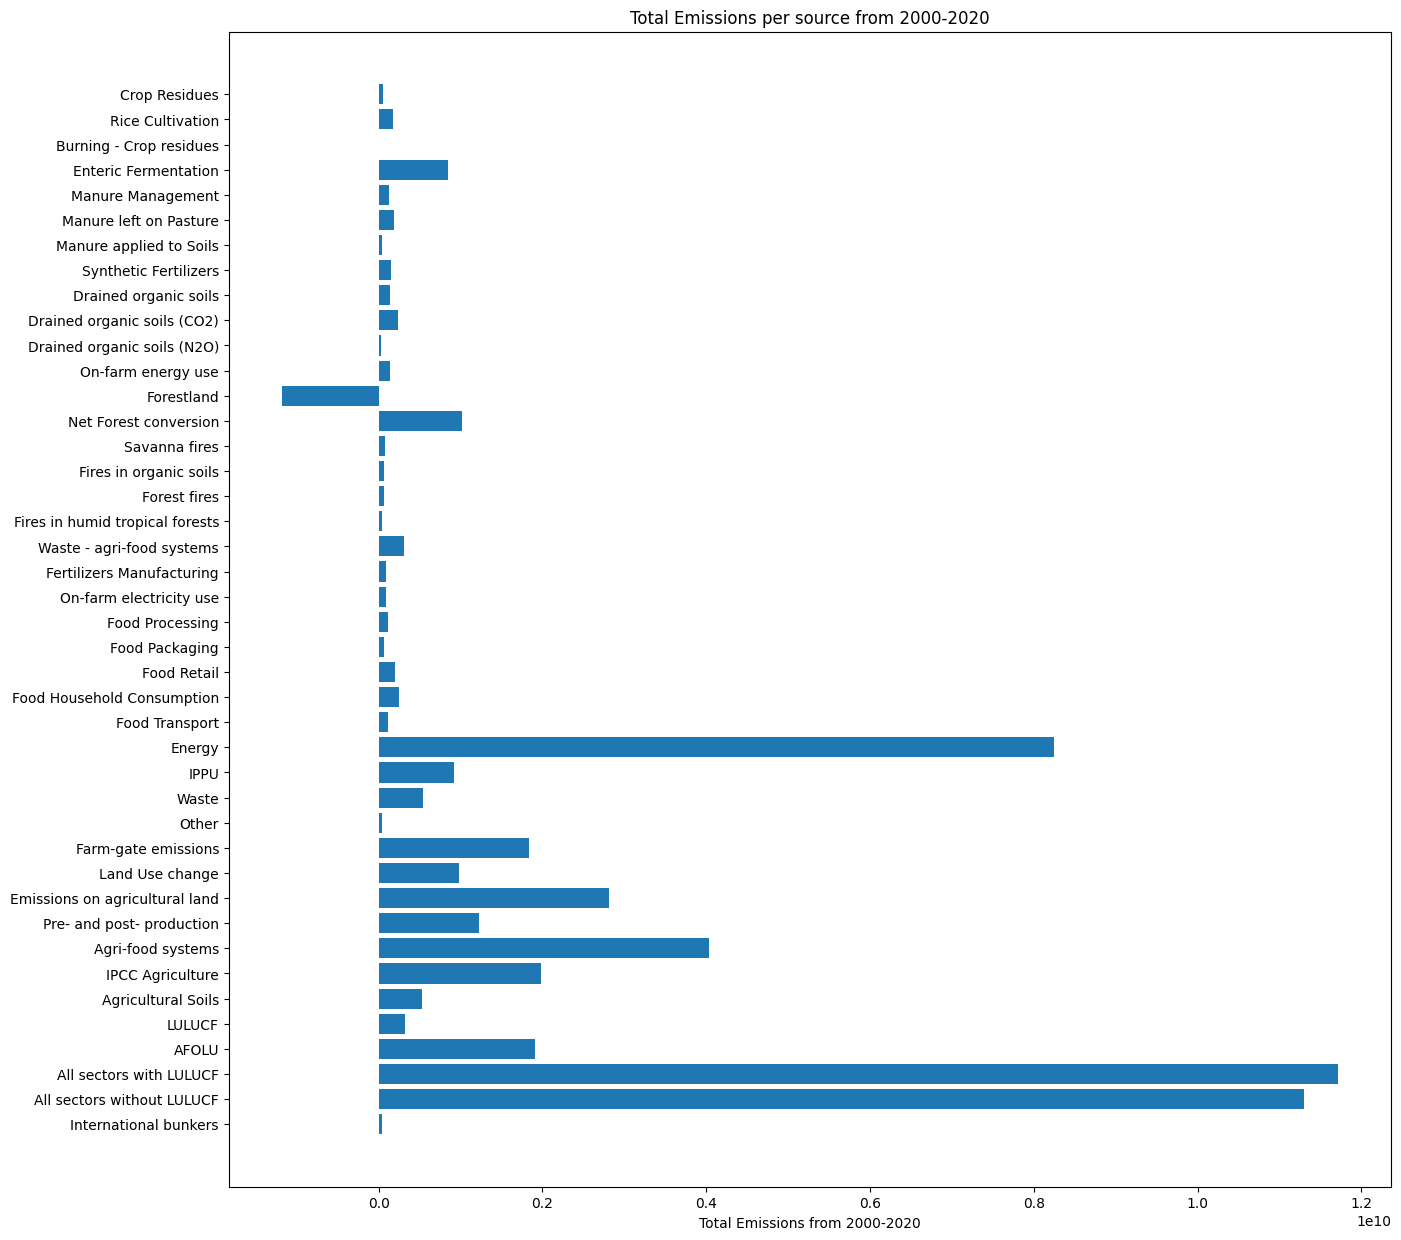

In [27]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)

y_pos = np.arange(len(src_emission_dict.keys()))
emissions_kt = src_emission_dict.values()
labels = src_emission_dict.keys() 

ax.barh(y_pos, emissions_kt, align="center")
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()
ax.set_xlabel('Total Emissions from 2000-2020')
ax.set_title("Total Emissions per source from 2000-2020")

plt.show()


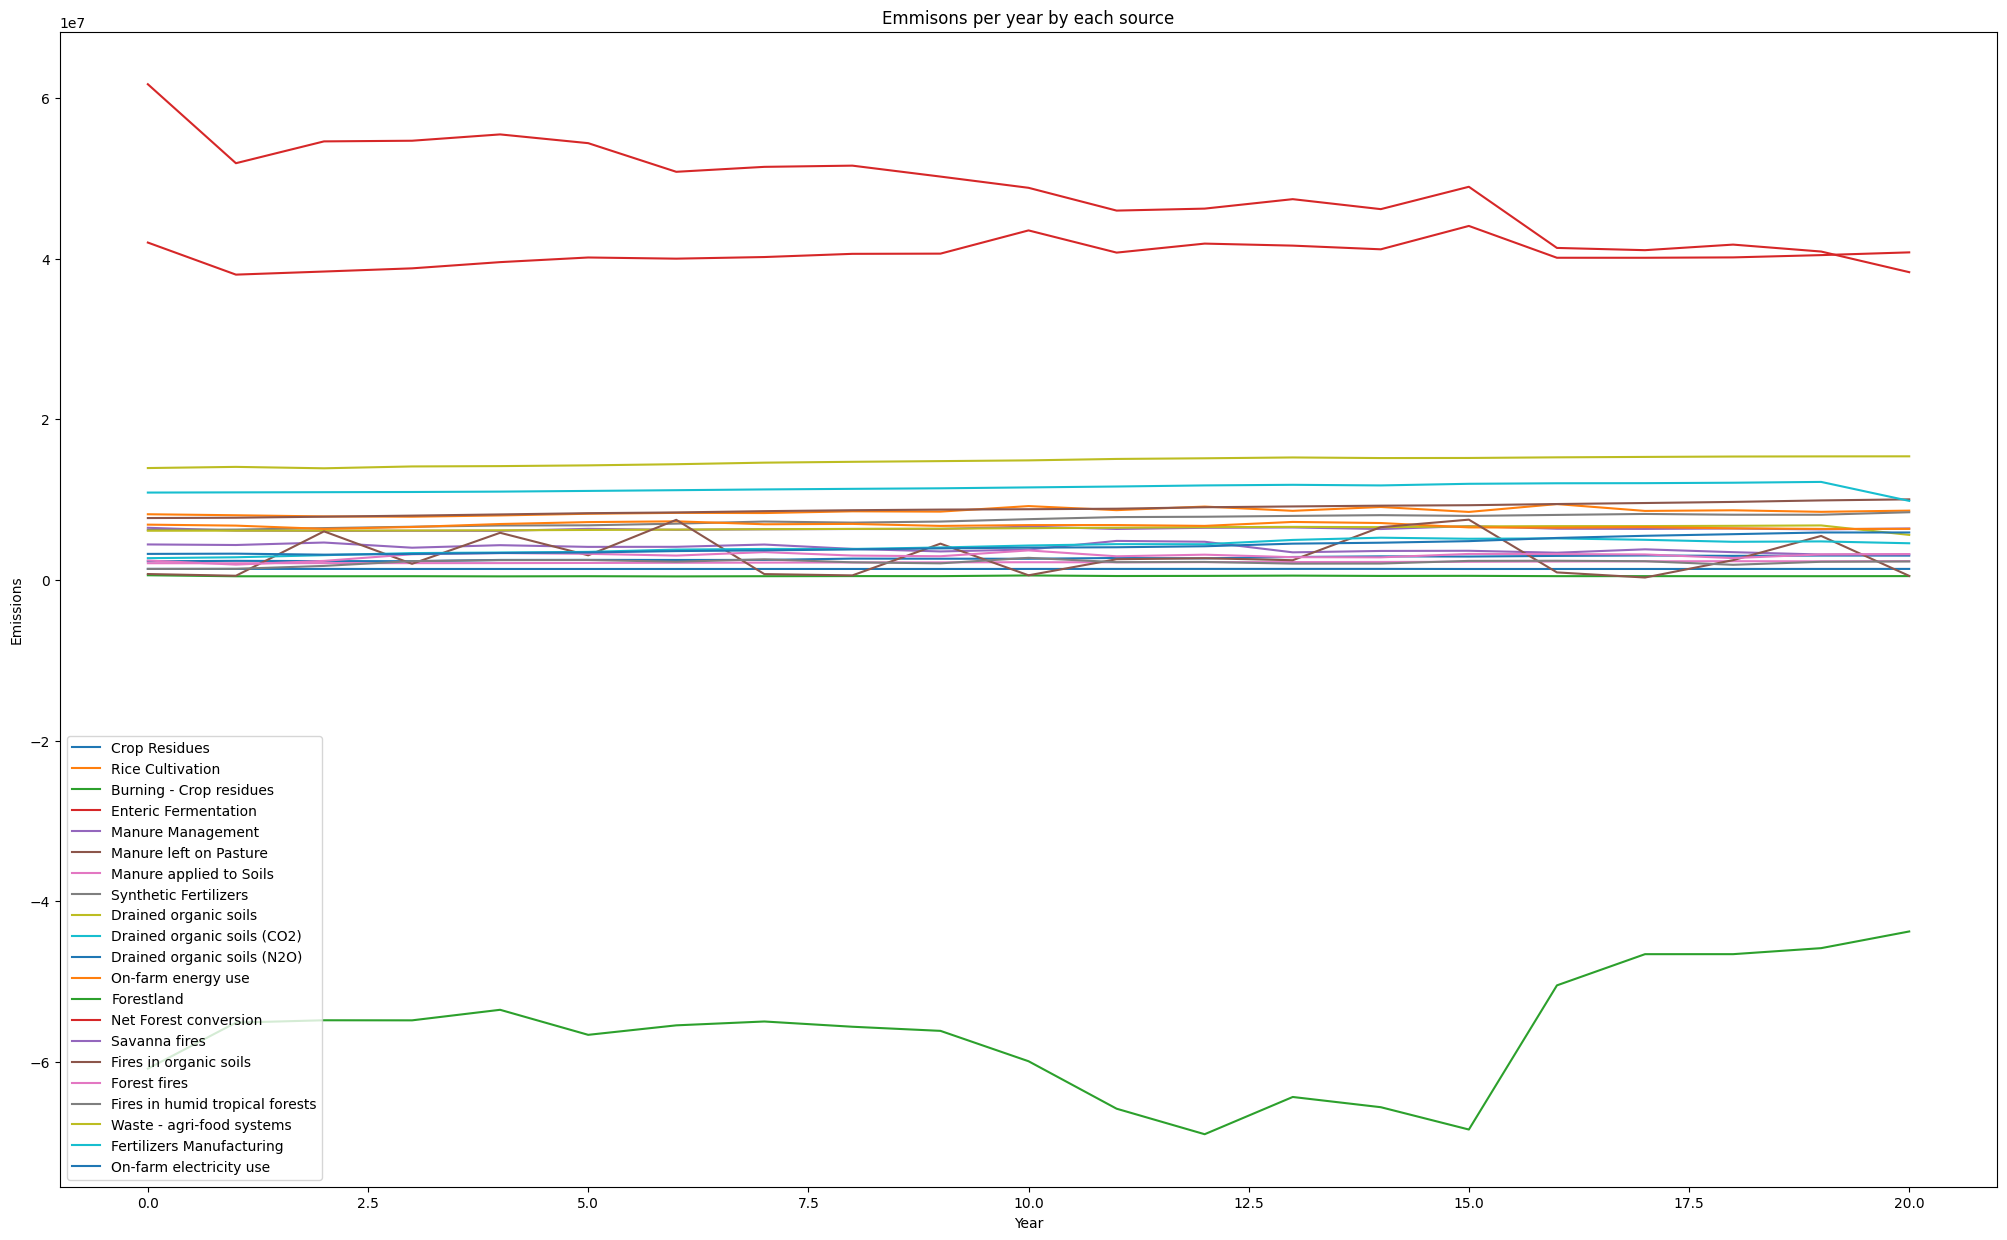

In [18]:
df_src_tl = pd.DataFrame.from_dict(src_emission_dict_timeline)
df_src_tl.set_index('year')
plt.figure(figsize=(25, 15))
for clmn, year in zip(df_src_tl.columns[1:], df_src_tl['year'].to_list()):
    plt.plot(df_src_tl.index, df_src_tl[clmn], label=str(clmn))
plt.title("Emmisons per year by each source")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend()
plt.show()

In [112]:
plotdata_dict[2000]

[205885.22009999998,
 114522.17689999999,
 1350194.7783000001,
 -347.1057,
 3946.0901999999996,
 1260587.8842000002,
 652.4896,
 3800.8656,
 4819050.292000001,
 57629.006799999996,
 16444.0221,
 7687089.189599999,
 547441.4855000001,
 415114.069,
 17052.4939,
 274559.6674,
 2011248.6506999999,
 12092.5573,
 992573.6761999999,
 1141053.9128999999,
 0.0,
 158682.8772,
 318928.9303,
 322.4393,
 -43161.903900000005,
 1862129.1282,
 169513.06339999998,
 687097.5244999999,
 32296738.160399996,
 912.7738999999999,
 84815.5964,
 260143.3244,
 438435.44480000006,
 113230.59270000001,
 1547.9020999999998,
 425096.33180000004,
 1077915.5049,
 6884513.9767,
 108.393,
 649060.6603,
 726222.8611999999,
 0.0,
 560024.2359000001,
 41391835.687599994,
 338699.8716999999,
 13088.890300000001,
 39344208.1962,
 1695838.7286,
 3323527.0968,
 1184.5633999999995,
 103417.2669,
 490.9978,
 174683.85070000004,
 1695805.4583,
 200158.3022,
 373086.3637,
 62944.3153,
 1010151.0141999999,
 0.0,
 806303.9927000001

In [116]:
math.log(125732384.46779999)

18.649666273376408

In [1]:
plotdata_dict = {}
for year in range(2000, 2021):
    plotdata_dict[year] = []
    ix = 0
    for idx, clmn in enumerate(list(emission_per_country_dict_tl.keys())[1:]):
        val = emission_per_country_dict_tl[clmn][ix]
        plotdata_dict[year].append(val)
    ix+=1

plotdata = pd.DataFrame(plotdata_dict,
    index=list(emission_per_country_dict_tl.keys())[1:])

ax = plotdata.plot(kind='barh', stacked=True, figsize=(50, 512))
ax.invert_yaxis()  # invert the y-axis

plt.title("FIFA ratings")
plt.xlabel("Ratings")
plt.ylabel("Footballer")

plt.show()


NameError: name 'emission_per_country_dict_tl' is not defined

In [44]:
emission_per_country_dict_tl

2000    2.072001e+07
2001    2.163981e+07
2002    2.153275e+07
2003    2.221522e+07
2004    2.295171e+07
2005    2.365083e+07
2006    2.450884e+07
2007    2.541528e+07
2008    2.646760e+07
2009    2.770458e+07
2010    2.940450e+07
2011    2.824964e+07
2012    2.939941e+07
2013    3.014047e+07
2014    3.158207e+07
2015    3.371326e+07
2016    3.351282e+07
2017    3.371900e+07
2018    3.472040e+07
2019    3.505138e+07
2020    3.399783e+07
dtype: float64

In [43]:
df_aa_em_tl.head()

,0
2000,2.072001e+07
2001,2.163981e+07
2002,2.153275e+07
2003,2.221522e+07
2004,2.295171e+07


In [121]:
emission = Emission(file_name)
print(emission.emission_sources)
df_af = emission.get_country_info("Afghanistan")

['Crop Residues', 'Rice Cultivation', 'Burning - Crop residues', 'Enteric Fermentation', 'Manure Management', 'Manure left on Pasture', 'Manure applied to Soils', 'Synthetic Fertilizers', 'Drained organic soils', 'Drained organic soils (CO2)', 'Drained organic soils (N2O)', 'On-farm energy use', 'Forestland', 'Net Forest conversion', 'Savanna fires', 'Fires in organic soils', 'Forest fires', 'Fires in humid tropical forests', 'Waste - agri-food systems', 'Fertilizers Manufacturing', 'On-farm electricity use', 'Food Processing', 'Food Packaging', 'Food Retail', 'Food Household Consumption', 'Food Transport', 'Energy', 'IPPU', 'Waste', 'Other', 'Farm-gate emissions', 'Land Use change', 'Emissions on agricultural land', 'Pre- and post- production', 'Agri-food systems', 'IPCC Agriculture', 'Agricultural Soils', 'LULUCF', 'AFOLU', 'All sectors with LULUCF', 'All sectors without LULUCF', 'International bunkers']


In [132]:
df_af.loc[df_af['Item']=="Crop Residues"]

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.520,0.5267,0.8200,0.9988,0.8225,1.1821,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.117,0.1185,0.1845,0.2247,0.1851,0.2660,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.637,0.6452,1.0045,1.2235,1.0075,1.4481,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


# TEST

In [13]:
df_cntry = df.loc[df['Area']=='Afghanistan']
df_cntry.loc[:, '2000':].sum()

2000    205885.2201
2001    196907.2112
2002    241671.6773
2003    250927.9447
2004    249268.9710
2005    346995.5740
2006    263802.5522
2007    271133.9258
2008    308590.9589
2009    336457.1234
2010    385207.1228
2011    414417.4525
2012    401337.6849
2013    539750.1353
2014    393513.9453
2015    382384.6998
2016    375011.6835
2017    382106.0625
2018    380649.5266
2019    382555.5951
2020    395682.5596
dtype: float64

In [12]:
df_cntry

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.5200,0.5267,0.8200,0.9988,0.8225,1.1821,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.1170,0.1185,0.1845,0.2247,0.1851,0.2660,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.6370,0.6452,1.0045,1.2235,1.0075,1.4481,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Afghanistan,All sectors without LULUCF,Emissions (N2O),kilotonnes,11.6453,10.2895,11.9045,12.3870,12.3179,12.8563,...,16.3091,16.3303,16.3723,17.3372,17.2410,17.0810,17.9014,15.9129,15.9893,16.7350
220,Afghanistan,All sectors without LULUCF,Emissions (CO2),kilotonnes,914.0000,945.0000,1226.0000,1357.0000,1066.0000,1489.0000,...,12390.0000,10564.0000,8801.0000,8100.0000,8184.0000,7040.0000,8201.0000,8686.0000,9476.0000,9438.0000
221,Afghanistan,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,11734.3967,10395.4910,12541.1191,12982.6335,13042.5729,13380.3087,...,18265.2421,18151.5956,18168.9210,18579.3400,17768.1663,17622.9015,17483.1518,17801.7414,17864.3197,18557.4042
222,Afghanistan,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,3085.9962,2726.7051,3154.6895,3282.5460,3264.2390,3406.9135,...,4321.9101,4327.5425,4338.6538,4594.3471,4568.8560,4526.4582,4743.8673,4216.9232,4237.1545,4434.7812


In [18]:
temp = df_cntry.loc[:,'2000'].to_list()

In [20]:
total = 0
for itm in temp:
    if str(itm)!='nan':
        total += itm
print(total)


205885.22010000004


In [4]:
df.head()

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.520,0.5267,0.8200,0.9988,0.8225,1.1821,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.117,0.1185,0.1845,0.2247,0.1851,0.2660,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.637,0.6452,1.0045,1.2235,1.0075,1.4481,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [47]:
len(set(df['Unit'].to_list()))

1

In [52]:
# Dropping the Column Unit since the value is constant across the dataset

In [53]:
df = df.drop(labels=['Unit'], axis=1)

In [5]:
Areas = df["Area"].to_list()
Areas_map = Counter(Areas)
print(Areas_map)
print(len(Areas_map.keys()))

Counter({'World': 288, 'United States of America': 276, 'Annex I countries': 276, 'Australia': 275, 'Non-Annex I countries': 275, 'France': 270, 'Italy': 269, 'Greece': 268, 'Japan': 268, 'European Union (27)': 267, 'Portugal': 265, 'Spain': 265, 'Hungary': 264, 'Bulgaria': 263, 'Poland': 263, 'Romania': 263, 'T?kiye': 263, 'Ukraine': 263, 'Finland': 259, 'Netherlands': 258, 'Russian Federation': 258, 'Canada': 257, 'Croatia': 257, 'Estonia': 257, 'Kazakhstan': 257, 'United Kingdom of Great Britain and Northern Ireland': 257, 'Colombia': 256, 'Denmark': 255, 'Ireland': 255, 'Belgium': 254, 'Iceland': 254, 'Lithuania': 254, 'Austria': 253, 'Latvia': 253, 'New Zealand': 253, 'Switzerland': 253, 'Belarus': 252, 'Slovenia': 252, 'Germany': 250, 'Viet Nam': 250, 'Cyprus': 249, 'Norway': 248, 'Sweden': 248, 'Czechia': 246, 'Luxembourg': 244, 'Slovakia': 244, 'Indonesia': 243, 'Brazil': 241, 'Malta': 241, 'Peru': 240, 'South Africa': 240, 'Albania': 239, 'Chile': 239, 'India': 239, 'Paraguay'

In [6]:
items = df["Item"].to_list()
items_map = Counter(items)
print(items_map)
print(len(items_map.keys()))

Counter({'IPCC Agriculture': 2882, 'LULUCF': 2303, 'Farm-gate emissions': 2181, 'Manure Management': 2052, 'Agricultural Soils': 2003, 'All sectors with LULUCF': 1855, 'All sectors without LULUCF': 1826, 'Agri-food systems': 1806, 'Burning - Crop residues': 1804, 'Pre- and post- production': 1781, 'Emissions on agricultural land': 1678, 'AFOLU': 1678, 'Land Use change': 1658, 'Waste - agri-food systems': 1609, 'On-farm electricity use': 1588, 'On-farm energy use': 1584, 'Savanna fires': 1530, 'Food Retail': 1499, 'Energy': 1498, 'IPPU': 1473, 'Manure applied to Soils': 1414, 'Food Processing': 1414, 'Food Household Consumption': 1414, 'Forest fires': 1408, 'Food Packaging': 1408, 'Waste': 1392, 'Crop Residues': 1391, 'Fires in humid tropical forests': 1375, 'Food Transport': 1374, 'Enteric Fermentation': 1290, 'Synthetic Fertilizers': 1260, 'Manure left on Pasture': 1258, 'Fires in organic soils': 1102, 'Drained organic soils (N2O)': 954, 'Other': 845, 'Forestland': 660, 'Net Forest co

In [54]:
class Agg:
    
    

2000                                                          
                count          mean           std           min          25%   
Area                                                                           
Afghanistan     201.0  1.024305e+03  2.985164e+03 -2.388803e+03     0.025500  \
Africa          212.0  1.877249e+05  4.717880e+05 -3.428801e+04   128.514350   
Albania         233.0  4.915115e+02  1.227278e+03  0.000000e+00     0.112500   
Algeria         233.0  5.794827e+03  2.410023e+04 -8.148200e+03     0.346600   
American Samoa   96.0 -3.615684e+00  1.515422e+01 -5.889910e+01     0.000000   
...               ...           ...           ...           ...          ...   
World           288.0  1.288437e+06  4.628599e+06 -3.477871e+06  1153.531300   
Yemen           217.0  1.461113e+03  4.235192e+03 -1.501320e+03     0.005700   
Yugoslav SFR      0.0           NaN           NaN           NaN          NaN   
Zambia          230.0  3.477187e+03  7.997975e+03  0.000000e+00     1.654225   
Zimbabwe        222.0  2.160807e+03  1.109334e+04 -8.803460e+04     0.356775   

                                                           2001                 
                        50%            75%           max  count          mean   
Area                                                                            
Afghanistan         7.72580     272.140000  1.573439e+04  201.0  9.796379e+02  \
Africa           4904.61610   77692.173100  3.592008e+06  212.0  1.878303e+05   
Albania             7.49850     183.391600  8.144264e+03  233.0  4.355783e+02   
Algeria            44.25760     684.933300  1.865155e+05  212.0  5.764787e+03   
American Samoa      0.00000       0.000000  1.002920e+01   96.0 -2.648905e+00   
...                     ...            ...           ...    ...           ...   
World           43694.84270  579258.677725  3.880104e+07  286.0  1.264318e+06   
Yemen               8.37010     595.996800  3.241884e+04  196.0  1.574982e+03   
Yugoslav SFR            NaN            NaN           NaN    0.0           NaN   
Zambia             61.89805    2226.735500  4.789305e+04  205.0  3.956042e+03   
Zimbabwe           33.35495    1579.901325  4.309981e+04  201.0  2.523332e+03   

                ...           2019                 2020                 
                ...            75%           max  count          mean   
Area            ...                                                     
Afghanistan     ...     408.977100  3.173213e+04  201.0  1.968570e+03  \
Africa          ...  100361.951250  4.825983e+06  212.0  2.530646e+05   
Albania         ...     188.520400  9.488471e+03  212.0  4.420949e+02   
Algeria         ...    1483.100000  2.838322e+05  212.0  9.539952e+03   
American Samoa  ...       0.000000  1.131500e+01   96.0 -2.718457e+00   
...             ...            ...           ...    ...           ...   
World           ...  614199.888400  5.414186e+07  282.0  1.583725e+06   
Yemen           ...     331.102675  3.732490e+04  196.0  1.709293e+03   
Yugoslav SFR    ...            NaN           NaN    0.0           NaN   
Zambia          ...    5544.000000  9.628410e+04  205.0  6.313204e+03   
Zimbabwe        ...    1046.362300  1.167952e+05  201.0  5.259827e+03   

                                                                      
                         std           min         25%          50%   
Area                                                                  
Afghanistan     5.085667e+03  0.000000e+00     0.13920     15.02270  \
Africa          6.238054e+05  0.000000e+00   246.01670  12082.54580   
Albania         1.232709e+03 -3.520139e+02     0.09590      3.55660   
Algeria         3.741596e+04 -4.407773e+02     1.31710     57.49730   
American Samoa  1.267854e+01 -5.037360e+01     0.00000      0.00000   
...                      ...           ...         ...          ...   
World           6.159851e+06 -2.636985e+06  1560.08495  48060.21290   
Yemen           4.824242e+03

In [111]:
df.loc[df['Area']=="Afghanistan"]

,Area,Item,Element,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),0.5200,0.5267,0.8200,0.9988,0.8225,1.1821,1.0277,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),0.1170,0.1185,0.1845,0.2247,0.1851,0.2660,0.2312,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),0.6370,0.6452,1.0045,1.2235,1.0075,1.4481,1.2589,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,333.6093,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,333.6093,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Afghanistan,All sectors without LULUCF,Emissions (N2O),11.6453,10.2895,11.9045,12.3870,12.3179,12.8563,12.3056,...,16.3091,16.3303,16.3723,17.3372,17.2410,17.0810,17.9014,15.9129,15.9893,16.7350
220,Afghanistan,All sectors without LULUCF,Emissions (CO2),914.0000,945.0000,1226.0000,1357.0000,1066.0000,1489.0000,1826.0000,...,12390.0000,10564.0000,8801.0000,8100.0000,8184.0000,7040.0000,8201.0000,8686.0000,9476.0000,9438.0000
221,Afghanistan,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),11734.3967,10395.4910,12541.1191,12982.6335,13042.5729,13380.3087,13663.0588,...,18265.2421,18151.5956,18168.9210,18579.3400,17768.1663,17622.9015,17483.1518,17801.7414,17864.3197,18557.4042
222,Afghanistan,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),3085.9962,2726.7051,3154.6895,3282.5460,3264.2390,3406.9135,3260.9961,...,4321.9101,4327.5425,4338.6538,4594.3471,4568.8560,4526.4582,4743.8673,4216.9232,4237.1545,4434.7812


In [104]:
df_h

In [102]:
df.groupby(["Area"]).groupby(["Item"])

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [100]:
df

,Area,Item,Element,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),5.200000e-01,5.267000e-01,8.200000e-01,9.988000e-01,8.225000e-01,1.182100e+00,1.027700e+00,...,1.032100e+00,1.372600e+00,1.401800e+00,1.458400e+00,1.242400e+00,1.194000e+00,1.061700e+00,8.988000e-01,1.217600e+00,1.317000e+00
1,Afghanistan,Crop Residues,Indirect emissions (N2O),1.170000e-01,1.185000e-01,1.845000e-01,2.247000e-01,1.851000e-01,2.660000e-01,2.312000e-01,...,2.322000e-01,3.088000e-01,3.154000e-01,3.281000e-01,2.795000e-01,2.687000e-01,2.389000e-01,2.022000e-01,2.740000e-01,2.963000e-01
2,Afghanistan,Crop Residues,Emissions (N2O),6.370000e-01,6.452000e-01,1.004500e+00,1.223500e+00,1.007500e+00,1.448100e+00,1.258900e+00,...,1.264300e+00,1.681500e+00,1.717300e+00,1.786500e+00,1.522000e+00,1.462700e+00,1.300500e+00,1.101100e+00,1.491600e+00,1.613300e+00
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,3.336093e+02,...,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,3.336093e+02,...,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58760,OECD,All sectors without LULUCF,Emissions (CO2),1.334328e+07,1.326305e+07,1.332979e+07,1.352237e+07,1.366651e+07,1.369481e+07,1.369710e+07,...,1.289801e+07,1.270146e+07,1.274243e+07,1.261664e+07,1.253301e+07,1.241227e+07,1.243658e+07,1.254684e+07,1.217070e+07,1.088919e+07
58761,OECD,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),3.941893e+05,3.882647e+05,4.176531e+05,4.392191e+05,4.672796e+05,5.080909e+05,5.511406e+05,...,7.759070e+05,7.826597e+05,8.006688e+05,8.326775e+05,8.546258e+05,8.741566e+05,8.884415e+05,9.049044e+05,9.172806e+05,9.208261e+05
58762,OECD,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),2.145052e+06,2.126567e+06,2.093083e+06,2.038232e+06,2.047953e+06,2.008645e+06,2.039932e+06,...,1.980459e+06,1.971959e+06,1.922551e+06,1.934854e+06,1.924370e+06,1.880327e+06,1.915982e+06,1.923635e+06,1.882769e+06,1.825476e+06
58763,OECD,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),8.535273e+05,8.496131e+05,8.400758e+05,8.124412e+05,8.328157e+05,8.123489e+05,8.257754e+05,...,8.344119e+05,8.490201e+05,8.204159e+05,8.325680e+05,8.289014e+05,8.218071e+05,8.400423e+05,8.349622e+05,8.118189e+05,8.009744e+05


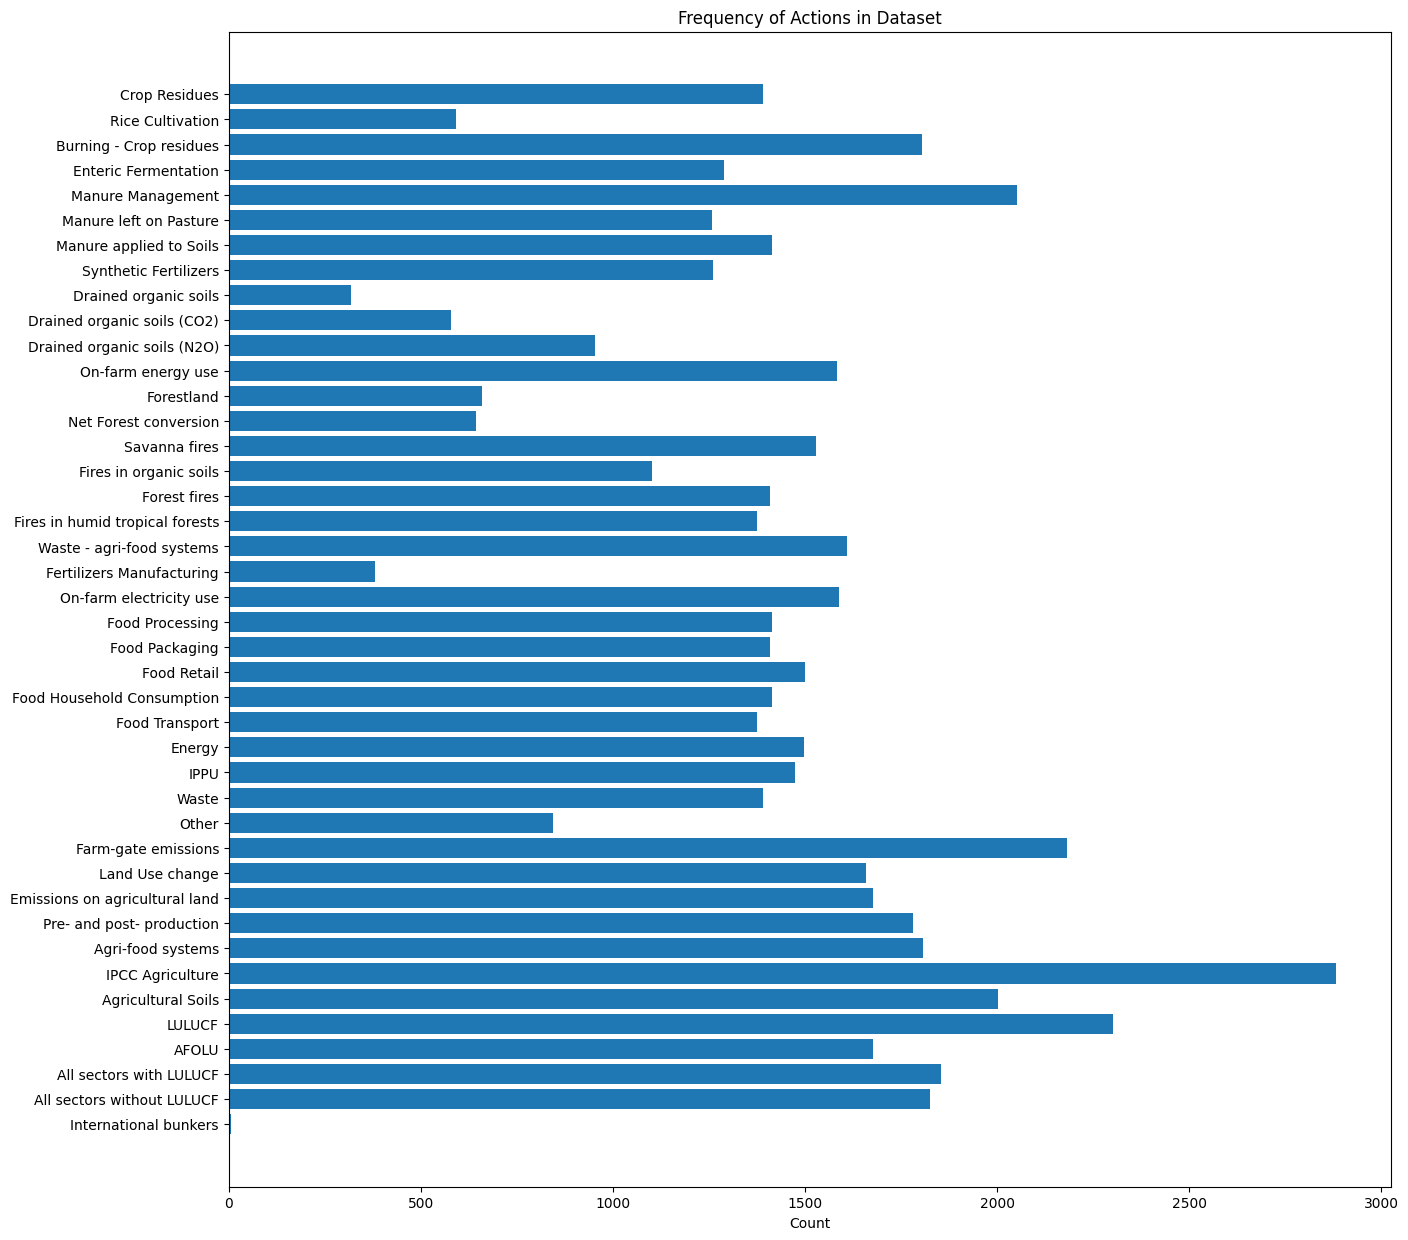

In [39]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)

items_map = Counter(df['Item'].to_list())

keys = items_map.keys()
y_pos = np.arange(len(keys))
performance = items_map.values()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_title("Frequency of Actions in Dataset")

plt.show()

In [43]:
elements = df['Element'].to_list()
print(len(elements))
print(len(set(elements)))
print(set(elements))

58765
9
{'Emissions (N2O)', 'Indirect emissions (N2O)', 'Emissions (CH4)', 'Emissions (CO2eq) from N2O (AR5)', 'Emissions (CO2)', 'Emissions (CO2eq) from CH4 (AR5)', 'Emissions (CO2eq) from F-gases (AR5)', 'Emissions (CO2eq) (AR5)', 'Direct emissions (N2O)'}


In [44]:
total_emissions = df.groupby('Country')['Total GHG Emissions (ktCO2e)'].sum().sort_values()


KeyError: 'Country'

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame


# Convert the 'year' column to datetime format and set it as the index
df['year'] = pd.to_datetime(df['2020'], format='%Y')
df.set_index('year', inplace=True)

# Group the DataFrame by country and calculate the total emissions for each year
grouped = df.groupby('country').sum()

# Plot the time series for the top 5 countries with the highest emissions in 2020
top_5 = grouped.loc[:, '2020'].nlargest(5).index
grouped.loc[top_5].T.plot()
plt.ylabel('CO2 Emissions (kilotonnes)')
plt.title('Total CO2 Emissions by Country')
plt.show()

ValueError: time data "1" doesn't match format "%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [22]:
import seaborn as sns
from collections import Counter

# Create a Counter object
data = [(1, 'cat'), (2, 'dog'), (1, 'cat'), (3, 'fish'), (2, 'dog'), (2, 'dog'), (1, 'cat'), (1, 'cat')]
counter = Counter(data)

# Create a heatmap of the counts
sns.heatmap(counter, annot=True, cmap='Blues')
plt.show()



ValueError: Must pass 2-d input. shape=()

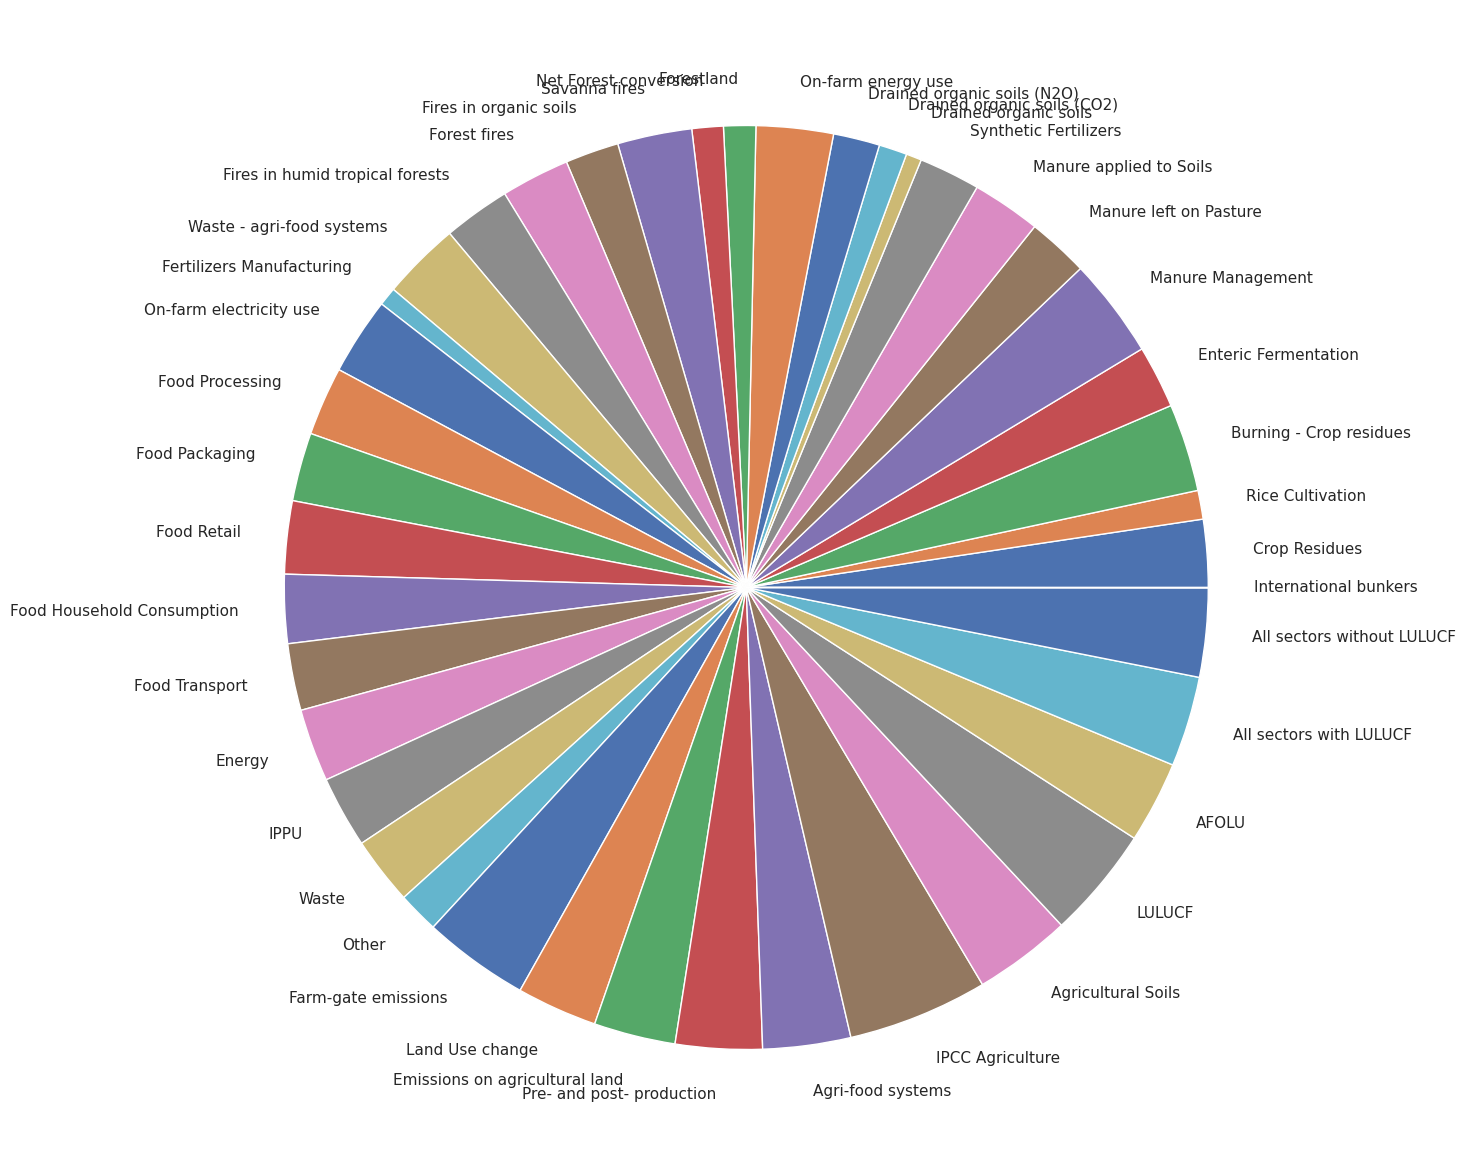

In [107]:
import matplotlib.pyplot as plt
from collections import Counter

data = items
counter = Counter(data)

plt.pie(counter.values(), labels=counter.keys())
plt.show()


In [95]:
print(items_map['Forestland'])
print(items_map['Net Forest conversion'])

660
644


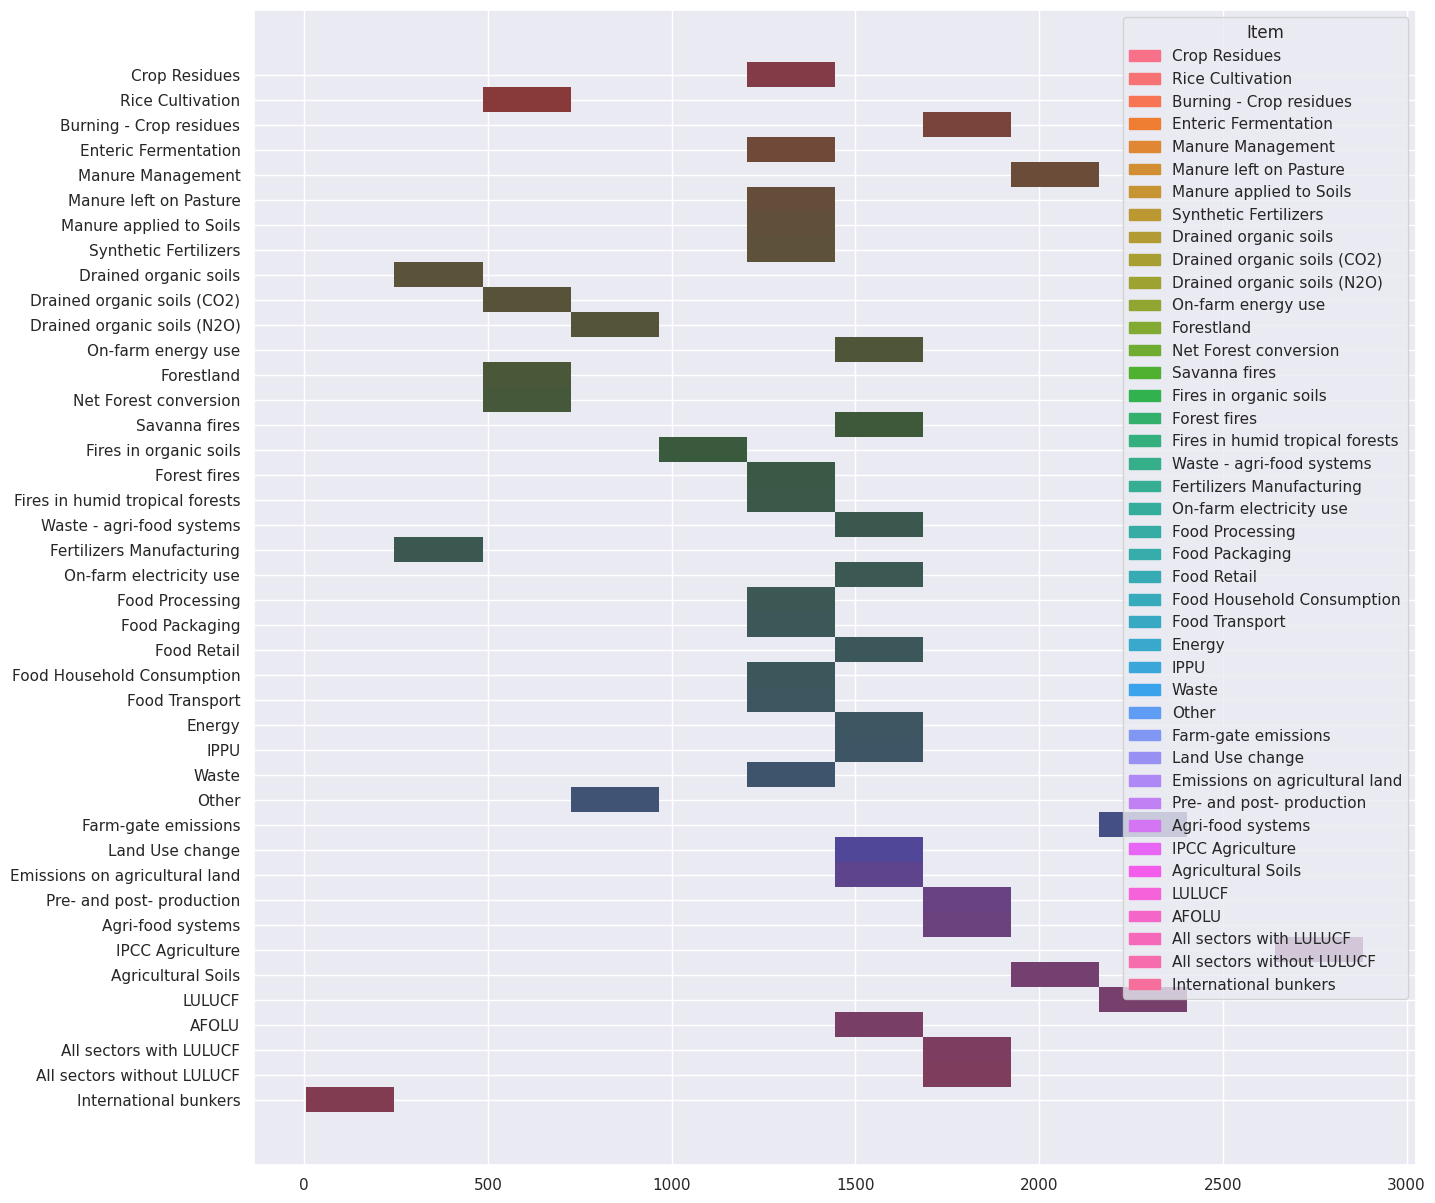

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
item_count_map = Counter(df['Item'].to_list())
df_item = pd.DataFrame.from_dict(item_count_map, orient='index').reset_index()
datf = pd.DataFrame({"Item": items_map.keys(),
                 "Count" : items_map.values()})
p = sns.histplot(data = datf, x='Count', y='Item', hue='Item', fill=True, cbar_ax=True)
p.set(xlabel = None)
p.set(ylabel = None)
plt.show()

In [ ]:
sns.histplot(data=df["Item"].to_list(), x)

<Axes: xlabel='Count', ylabel='Value'>

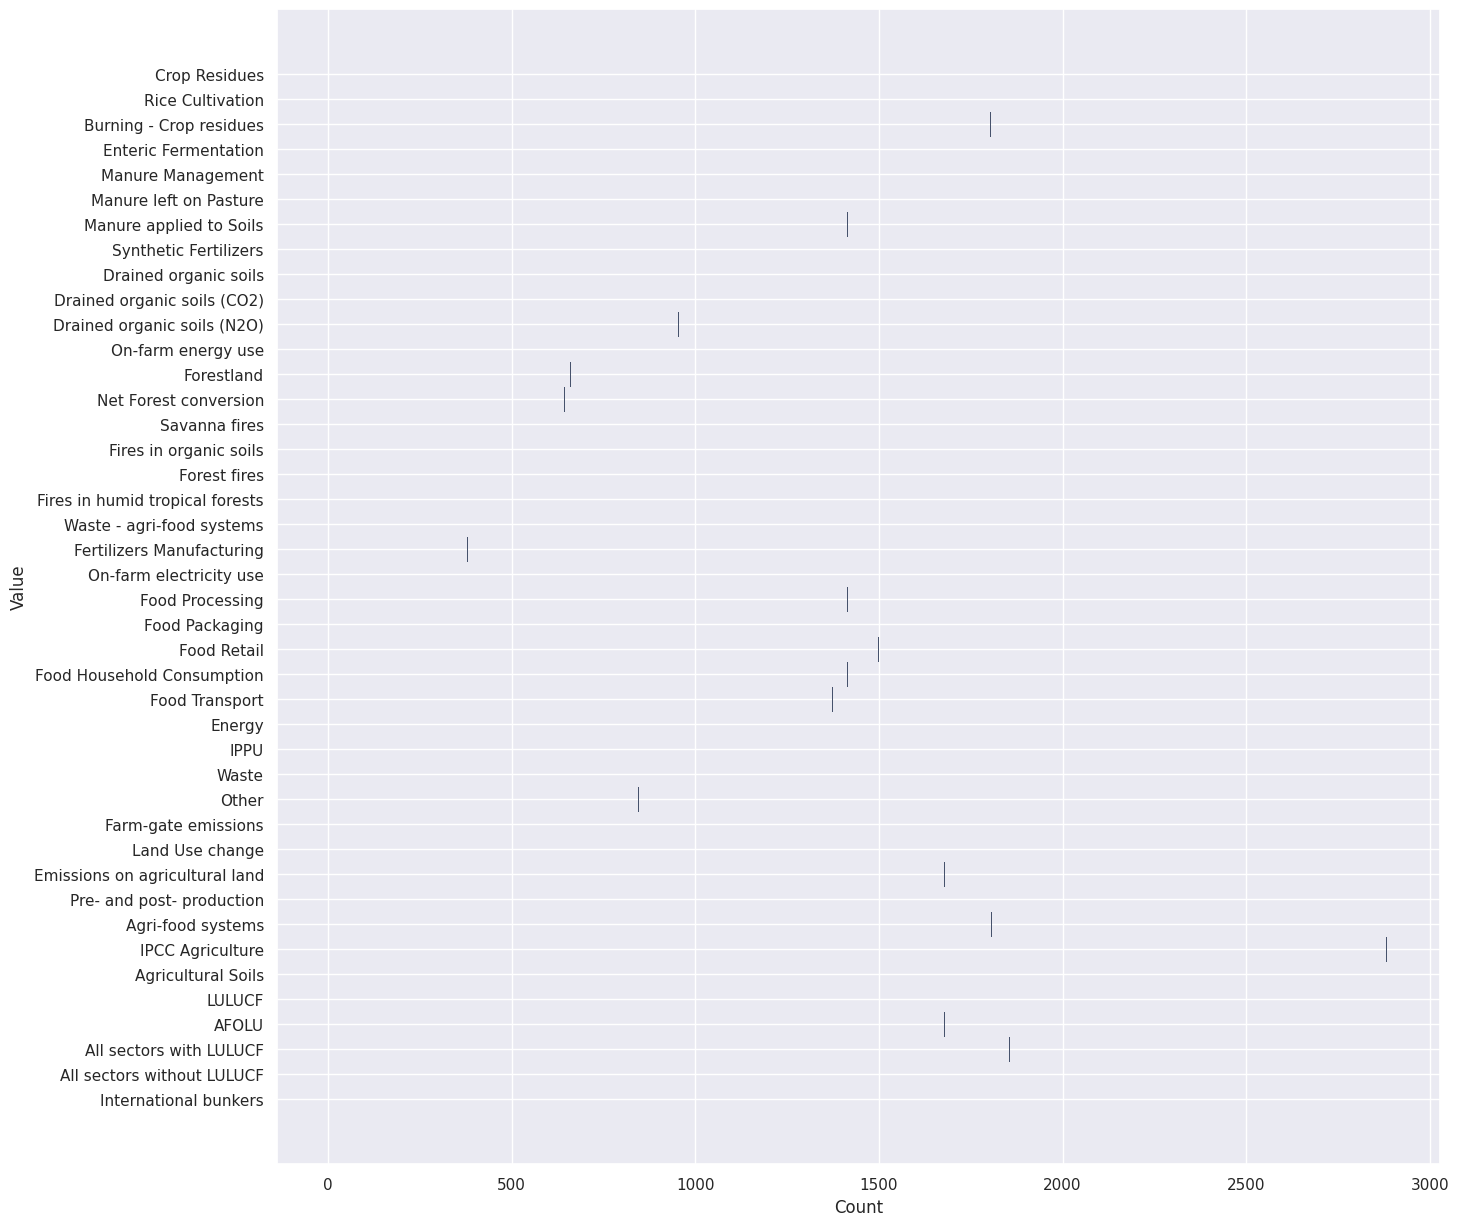

In [87]:
sns.set(rc={'figure.figsize':(15,15)})
item_count_map = Counter(df['Item'].to_list())
df_item = pd.DataFrame.from_dict(item_count_map, orient='index').reset_index()
df_item = df_item.rename(columns={'index':'Value', 0:'Count'})
#sns.histplot(data=df_item, x='Count',  y='Value', discrete=True)
sns.histplot(data=df_item, x='Count', y='Value', kde=True,  discrete=True, line_kws={'color':'red', 'linestyle': 'dashed'})

<Axes: xlabel='Count', ylabel='Value'>

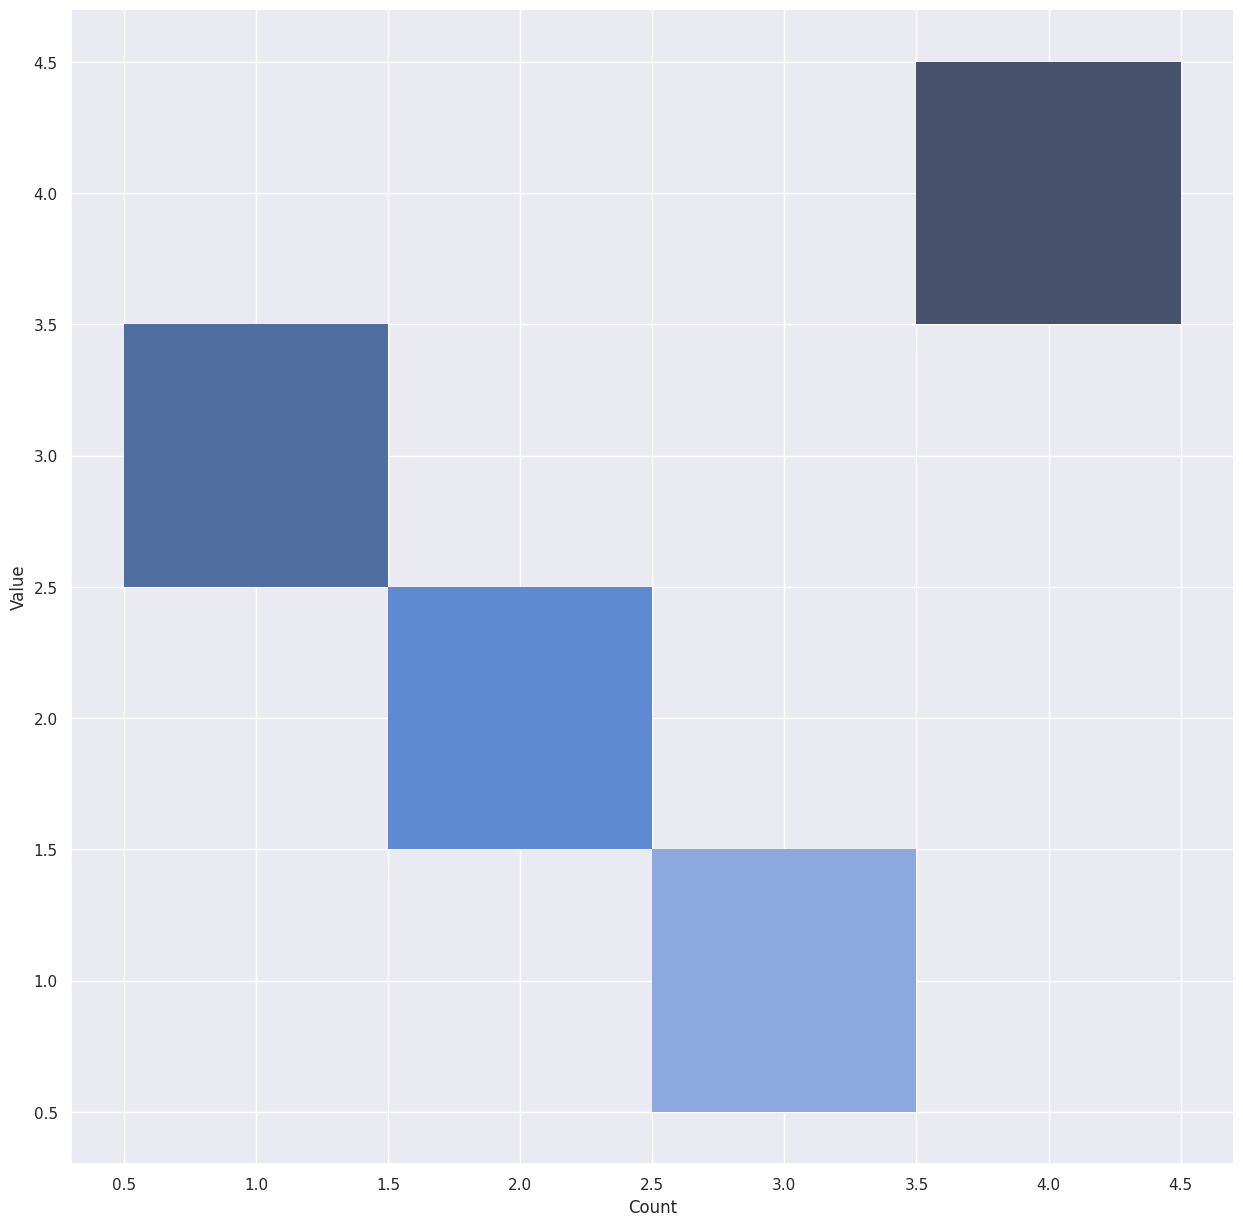

In [62]:
data = [1, 1, 1, 2, 2, 3, 4, 4, 4, 4]
counter = Counter(data)

df_ = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df_ = df.rename(columns={'index':'Value', 0:'Count'})

sns.histplot(data=df_, x='Count', y='Value', weights='Value', discrete=True)


In [33]:
df_item.transpose

<bound method DataFrame.transpose of                               value  Count
0                     Crop Residues   1391
1                  Rice Cultivation    591
2           Burning - Crop residues   1804
3              Enteric Fermentation   1290
4                 Manure Management   2052
5            Manure left on Pasture   1258
6           Manure applied to Soils   1414
7             Synthetic Fertilizers   1260
8             Drained organic soils    319
9       Drained organic soils (CO2)    578
10      Drained organic soils (N2O)    954
11               On-farm energy use   1584
12                       Forestland    660
13            Net Forest conversion    644
14                    Savanna fires   1530
15           Fires in organic soils   1102
16                     Forest fires   1408
17  Fires in humid tropical forests   1375
18        Waste - agri-food systems   1609
19        Fertilizers Manufacturing    380
20          On-farm electricity use   1588
21               

In [34]:
df_item

,value,Count
0,Crop Residues,1391
1,Rice Cultivation,591
2,Burning - Crop residues,1804
3,Enteric Fermentation,1290
4,Manure Management,2052
5,Manure left on Pasture,1258
6,Manure applied to Soils,1414
7,Synthetic Fertilizers,1260
8,Drained organic soils,319
9,Drained organic soils (CO2),578
